<a href="https://colab.research.google.com/github/JamalpurePooja/AirlinePassengerML/blob/main/Airline_passenger_referral_prediction_By_Pooja_Jamalpure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name- Airline Passeneger Referral Prediction
##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name - Pooja Jamalpure**


#Github Link


##**Abstract:**
As we know covid-19 hugely affected air businesses and most of the airline now is sitting on the verge of Bankruptcy because of this situation. Long term solutions needed to solve these problems and any bad decision may lead to severe outcomes where no stakeholder wants to invest without any future assurance. As we know this situation is not permanent and it will be over but once this is over there will be a high surge as people will be back for holidays overseas. What can airlines do to tackle this situation? Where will be the future demand? To answer this question, a machine learning model for classification is created from the airline_reviews dataset. This dataset has been  provided to us by Almabetter in order to identify the important factors that lead to better customer satisfaction.


##**Introduction**:
The Airline passenger Referral system has become the most important criteria globally for the airline industry in order to address the surge which has been created after global pandemic so as to remain in the global market competition.
Airline referral system generally works on customer reviews which is basically sentiment given by the customer depending upon various factor like seat comfort, their trip distance, route they have travelled, timing, the airline frequency, ground service etc. on the basis of which sentiment reviews are analysed and machine learning model on classification is prepared which helps airline industries to focus on the factor resolving which it can actually help them in business growth better than the competitors


##**Problem Statement**:
Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.

##**Data descriptions:**


*   **airline**: Name of the airline.

*   **overall**: Overall point is given to the trip between 1 to 10.


*   **author**: Author of the trip


*   **reviewdate**: Date of the Review customer
*   **review**: Review of the customers in free text format



*  **aircraft**: Type of the aircraft

*   **travellertype**: Type of traveler (e.g. business, leisure)


*   **cabin**: Cabin at the flight
*   **date flown**: Flight date

*  **seatcomfort**: Rated between 1-5


*   **cabin service**: Rated between 1-5

*   **foodbev**: Rated between 1-5
*   **entertainment**: Rated between 1-5


*   **groundservice**: Rated between 1-5

*   **valueformoney**: Rated between 1-5





#**Import Libraries**

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb

In [2]:
# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


import warnings
warnings.filterwarnings('ignore')

In [3]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading the xlsx file from drive
df=pd.read_excel("/content/drive/MyDrive/AlmaBetter/data_airline_reviews.xlsx")

#Let's Understand the Data

In [116]:
df.head()

,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,recommended,travel_month
1,Turkish Airlines,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01,yes,5.0
3,Turkish Airlines,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01,no,5.0
5,Turkish Airlines,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01,no,5.0
7,Turkish Airlines,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,2019-04-01,yes,4.0
9,Turkish Airlines,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01,no,5.0


#**Exploratory Data Analysis(EDA)**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

* Here we can see that there are 131895 rows and 17 columns.Also we can see that there are 7 float type feature and 10 object type feature.

In [7]:
#let's calculate the null values
df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

In [8]:
#drop the null values
df.dropna(how='all',inplace=True)


In [9]:
#Counting number of duplicate values
df.duplicated().sum()

4764

In [10]:
#Droping duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61183 entries, 1 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61183 non-null  object 
 3   review_date      61183 non-null  object 
 4   customer_review  61183 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   date_flown       37434 non-null  object 
 10  seat_comfort     56211 non-null  float64
 11  cabin_service    56240 non-null  float64
 12  food_bev         48341 non-null  float64
 13  entertainment    40230 non-null  float64
 14  ground_service   37169 non-null  float64
 15  value_for_money  59327 non-null  float64
 16  recommended      59761 non-null  object 
dtypes: float64(7), o

* After dropping duplicates and null values there are 61183 entries and 17 columns 7 floattype and 8 object types

In [13]:
df.isna().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

<Axes: >

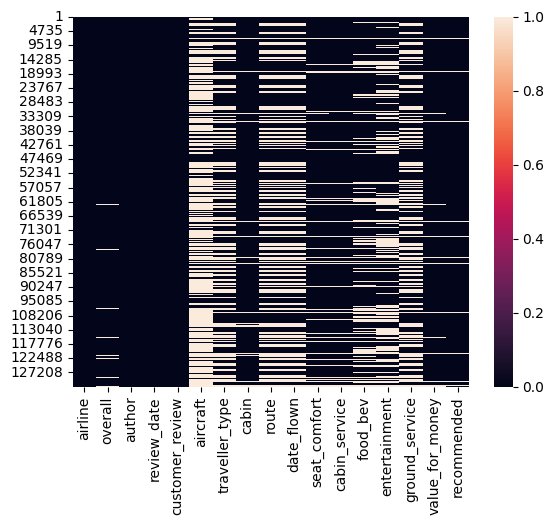

In [14]:
#visualize the missing value
sns.heatmap(df.isnull())

* We have successfully removed all null values from airline, author,customer_review,review_date column
* But still there are missing values in overall,aircraft,traveller_type,cabin route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,  ground_service,value_for_money,recommended.

In [15]:
top6_airlines=df['airline'].value_counts().head(6)
top6_airlines

airline
Spirit Airlines            2871
American Airlines          2846
United Airlines            2774
British Airways            2731
Emirates                   1763
China Southern Airlines    1719
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 6 Most Frequent Used Airlines')

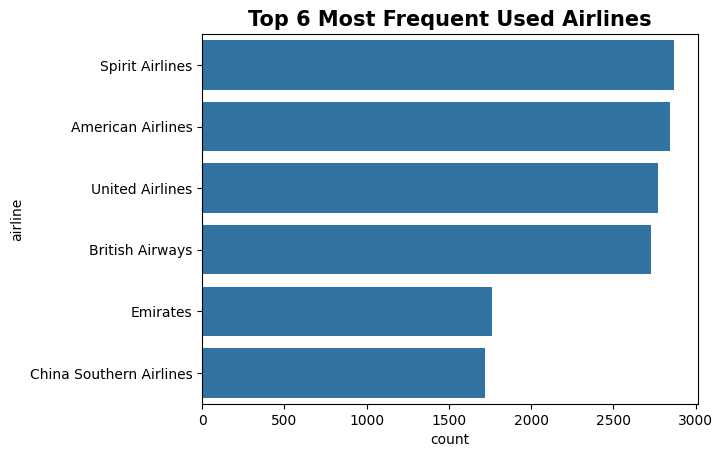

<Figure size 1000x600 with 0 Axes>

In [16]:
#visualize top 6 most frequent used airlines
graph=sns.barplot(x=top6_airlines,y=top6_airlines.index)
plt.figure(figsize=(10,6))
#plt.xticks(rotation=45)
graph.set_title("Top 6 Most Frequent Used Airlines",fontsize=15,fontweight='bold')

* From the Bar graph we can conclude that Spirit Airways is the most frequently used airlines with a total count of around 2800 according to the dataset given
* China South Airlines holds 6th position with total count of allmost 1600.

In [17]:
top10_aircraft=df['aircraft'].value_counts()[0:10]
top10_aircraft

aircraft
A320                2130
A380                1109
Boeing 777          1101
Boeing 737-800      1021
A330                 974
Boeing 787           833
Boeing 777-300ER     737
A321                 649
Boeing 737           649
A319                 639
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Most Frequent Used Aircraft')

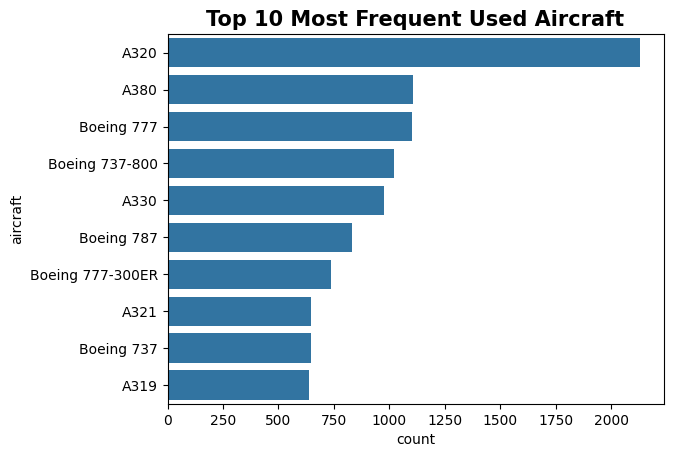

<Figure size 2000x1000 with 0 Axes>

In [18]:
#visualize top 10 most frequent used aircraft
graph=sns.barplot(x=top10_aircraft,y=top10_aircraft.index)
plt.figure(figsize=(20,10))
graph.set_title("Top 10 Most Frequent Used Aircraft",fontsize=15,fontweight='bold')

*  we can see that **aircraft A320** has travelled most frequently and also been used by most of the people.
*  It suggest that A320 aircrafts are highly popular among airlines

<Axes: xlabel='count', ylabel='traveller_type'>

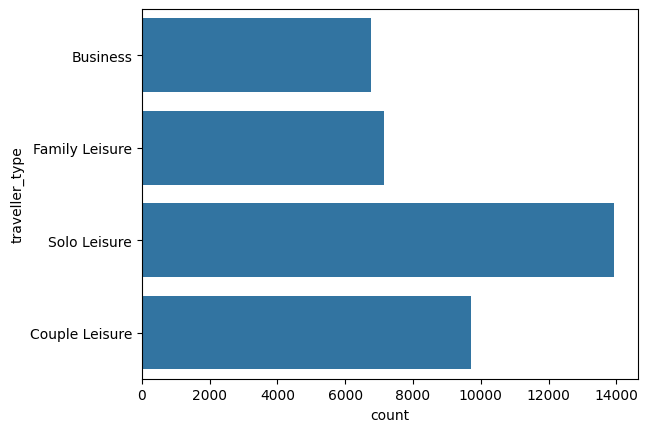

In [19]:
sns.countplot(df['traveller_type'])

* We can see there are 4 classes present in Traveller type feature.
* Also we can notice that Solo Leisure has highest value count. From this we can conclude that most of people who travel through airline travels in solo. Followed by College then Family.
* Very small percentage of people prefer flying for business.

<Axes: ylabel='count'>

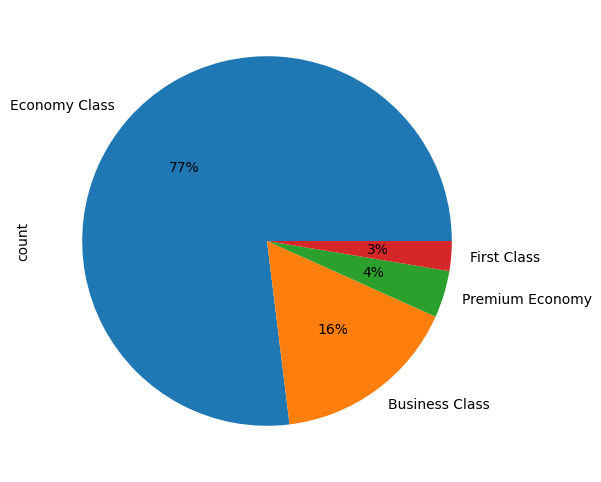

In [20]:
# Get the number of passengers for each cabin class through pie chart visualization
df['cabin'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(15,6))

From the above graph, we have observed that-

* 77% of passengers chose to fly in economy class as this category fare is lesser.
* Only 16% chose to fly by business class.
* so, these suggests that most of the people prefers cost-effective air travel and high income peoples are generally prefer business class as it is 2nd most popular cabin type.
* so good quality ecomomy, business class cabin can positively impacts customer satisfaction and airline businesses.

<Axes: xlabel='recommended'>

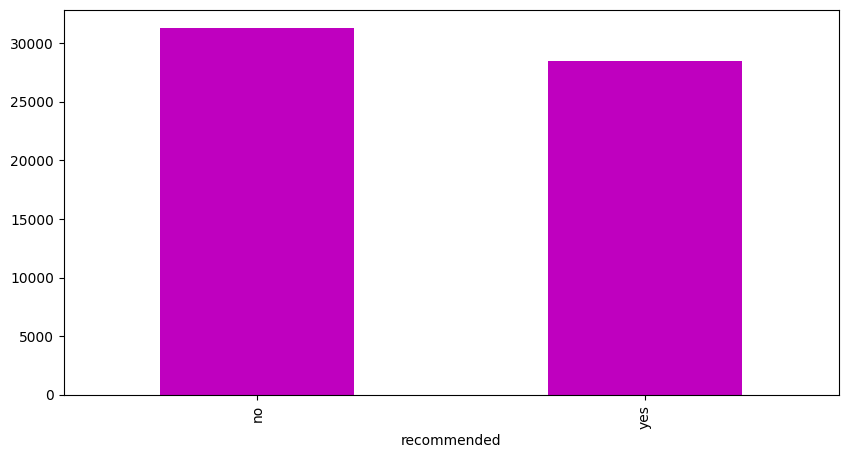

In [21]:
#plotting bar graph to identify classes of dependent feature
plt.figure(figsize=(10,5))
df['recommended'].value_counts().plot(kind='bar',color='m')

* we can see from graph that dependent feature recommendent has allmost balance feature Yes and No.
* It suggests that some people are not recommended airline services positively but some people also likes it.

In [22]:
df['date_flown'].array

<PandasArray>
[datetime.datetime(2019, 5, 1, 0, 0), datetime.datetime(2019, 5, 1, 0, 0),
 datetime.datetime(2019, 5, 1, 0, 0),                        'April 2019',
 datetime.datetime(2019, 5, 1, 0, 0), datetime.datetime(2019, 5, 1, 0, 0),
                        'April 2019',                        'April 2019',
                        'April 2019',                     'February 2019',
 ...
                                 nan,                                 nan,
                                 nan,                                 nan,
                                 nan,                                 nan,
                                 nan,                                 nan,
                                 nan,                                 nan]
Length: 61183, dtype: object

In [23]:
#changing the date_flown column from string to datetime format
df['date_flown']=df['date_flown'].apply(lambda x:pd.to_datetime(x))

In [24]:
#crating new feature to store month
df['travel_month']=df['date_flown'].dt.month

In [25]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'travel_month'],
      dtype='object')

Text(0.5, 1.0, 'Count of Travel Months')

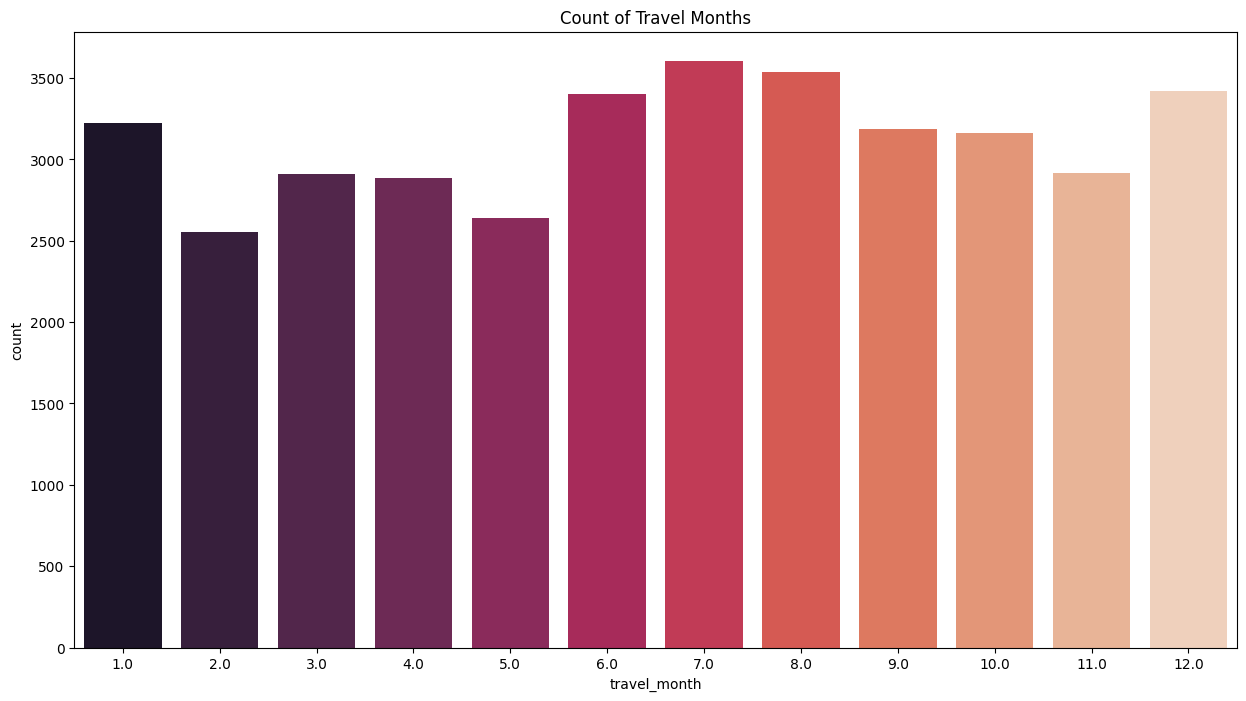

In [26]:
# Get countplot of 'travel_month' feature
plt.figure(figsize=(15,8))
sns.countplot(x='travel_month', color ='b',palette='rocket',data=df)
plt.title('Count of Travel Months')


we can see from the graph
* july month is most preferred by the airline travellers and february month has lowest travel frequency.
* We can also conclude that people tends to air travel more after june and from february to may they are not prefering air travel.

**Relation of Overall Rating of airlines and review features**

In [27]:
#function for stacked plot for rating feature
def rating_features(r):
  x=df.groupby([df['overall']])
  x[r].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(10,6))


In [28]:
review_feat=['seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money']


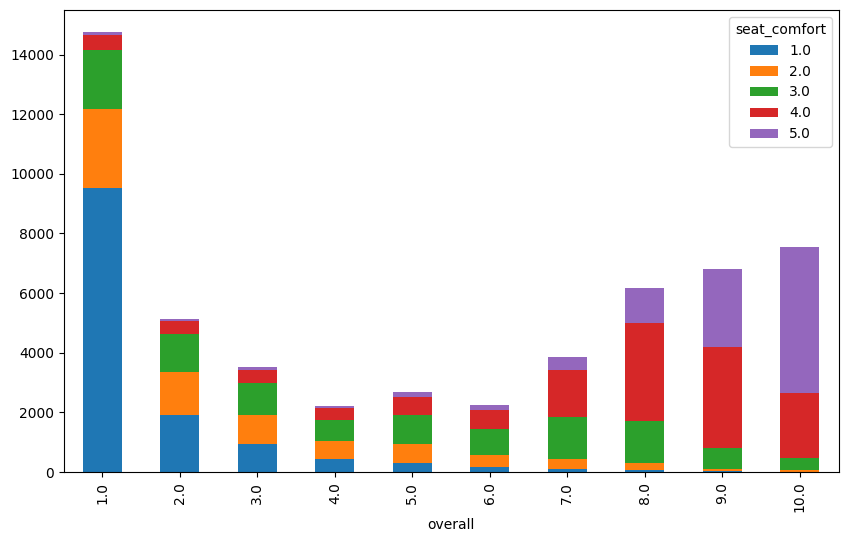

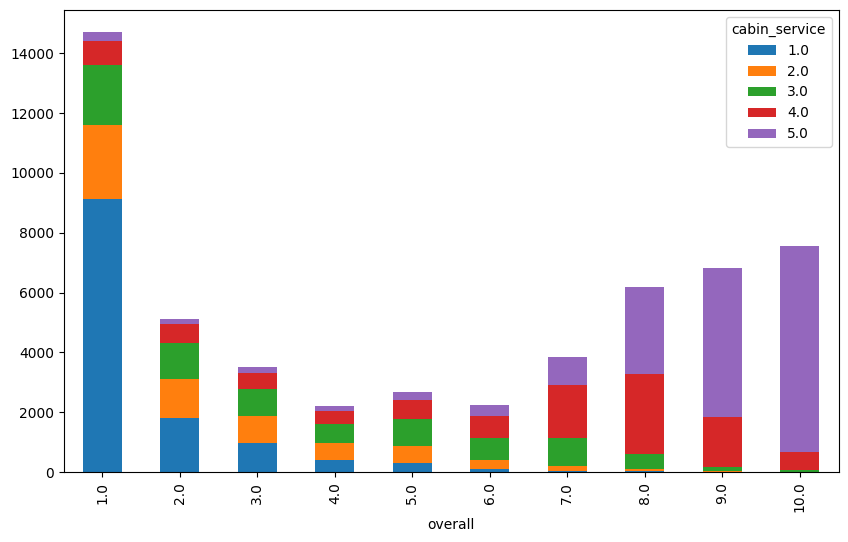

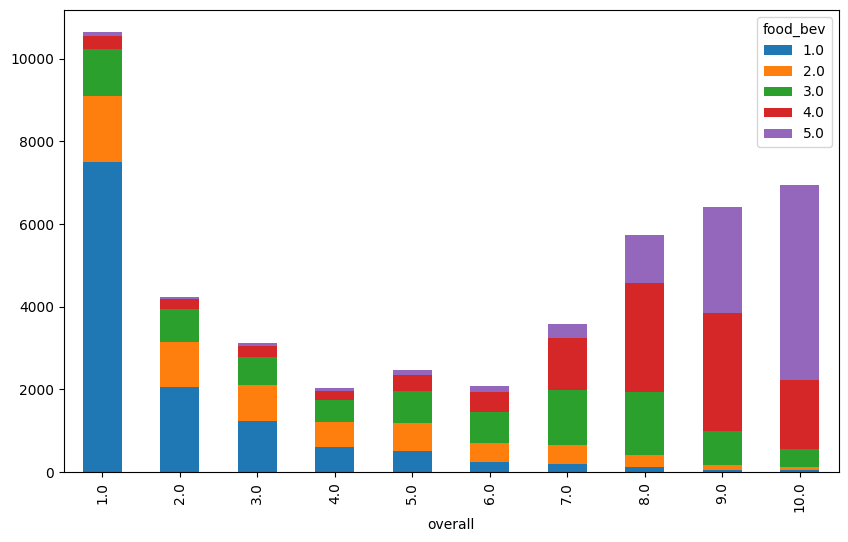

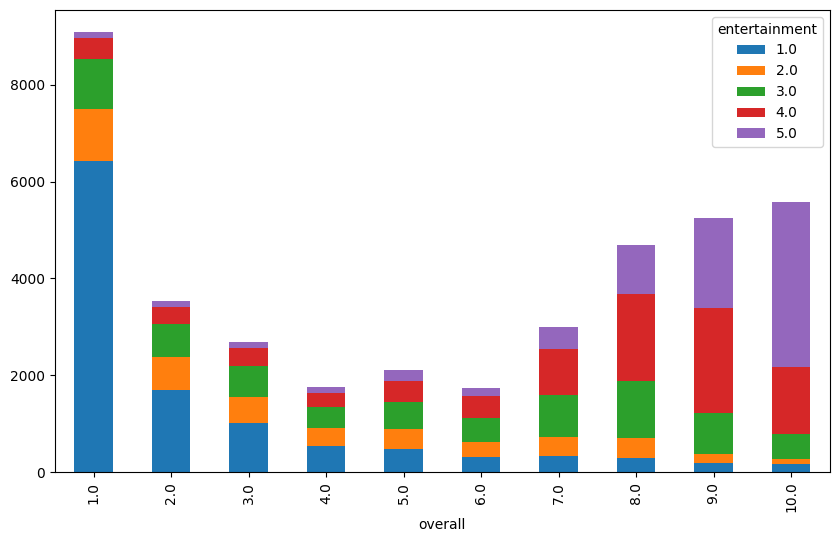

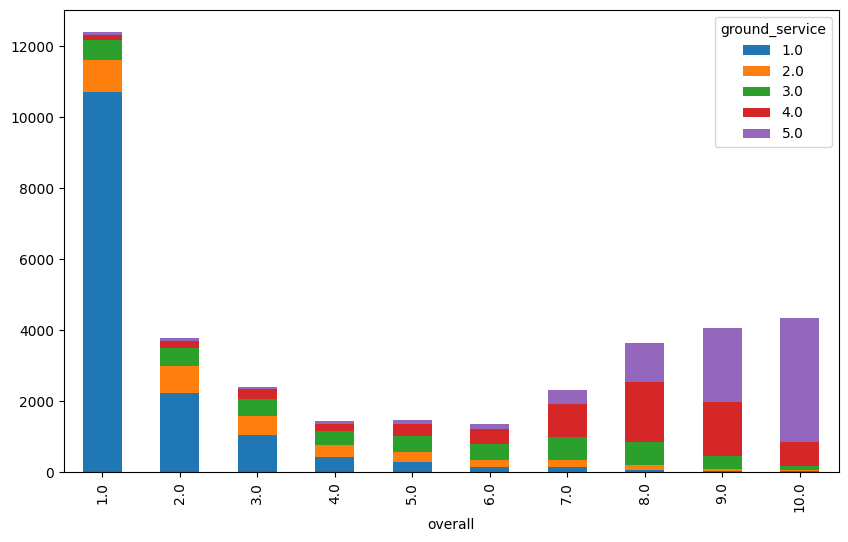

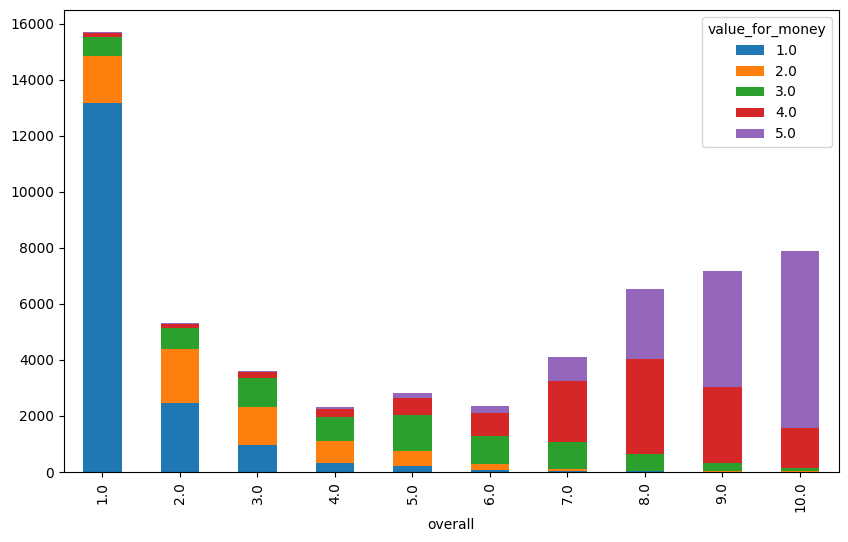

In [29]:
#get stacked plot fro review feat
for r in review_feat:
  rating_features(r)

From Above graph we can conclude that
* when overall rating of airlines are good(10.0 or 9.0 in range of 10) then rating of all features like 'seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money' are high(5.0 or 4.0 mostly in range of 5).
* when overall rating of airlines are low(1.0,2.0 in range of 10) then in that case all review features ratings are also low.
* It suggests this review features ratings positiviley impacts overall rating of airlines and obviously it massively impacts airline businesses.

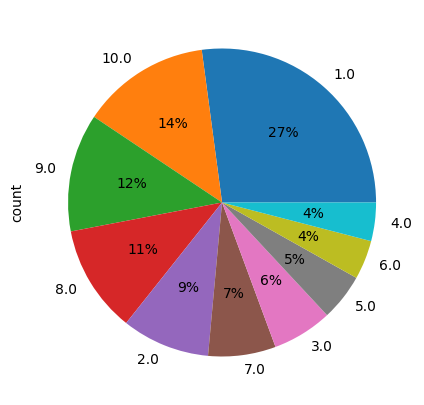

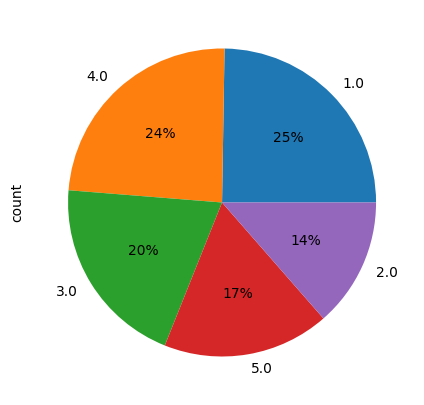

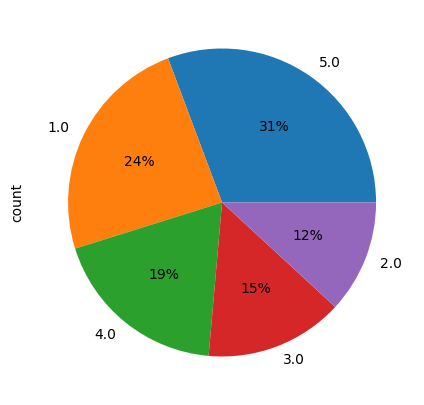

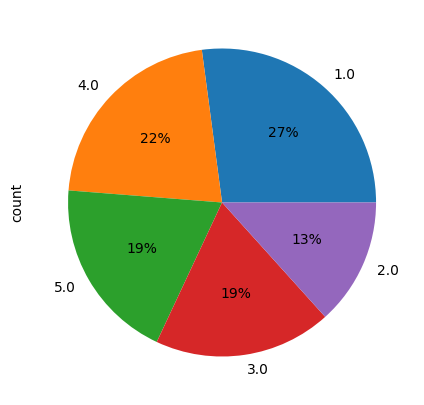

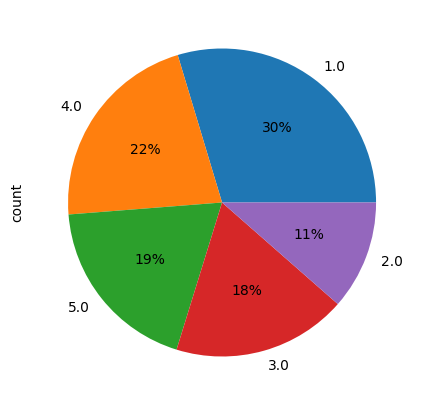

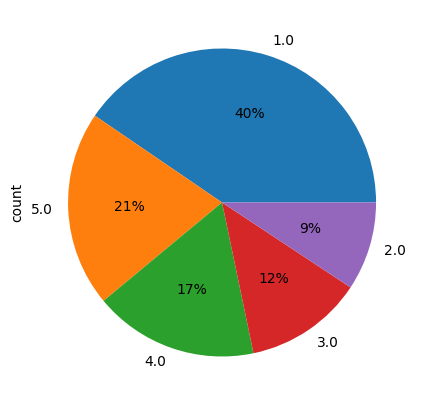

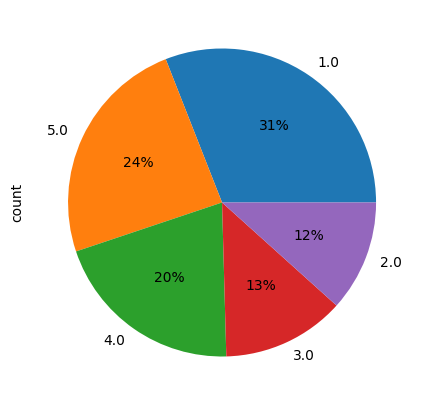

In [30]:

# Get the percentage distribution of passengers with different ratings for numerical features
for col in ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']:
  fig = plt.figure(figsize=(10, 5))
  ax = fig.gca()
  df[col].value_counts().plot(kind='pie',autopct='%1.0f%%')

From the above graphs, we have observed that-

* 44 % of passengers gave an overall rating of 7 and above on a scale of 10, for the services offered by the airlines.It implies that this section of people think that airlines are giving good services.

* 25 % of passengers are not satisfied with seat comfort.31% of passengers are fully statisfied with the cabin services.

* 41% of passengers are satisfied with food and beverages provided and 30% of passengers extremely dislikes the entertaintment service provided.

* 40% of passengers extremely dislikes the ground service and 44 % considers the trip to be value for money.
* we can conclude that airlines have to work hard to improve their services like value for money, food and beverages, entertainment etc otherwise it can negatively impacts airline business very soon.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61183 entries, 1 to 131894
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          61183 non-null  object        
 1   overall          59401 non-null  float64       
 2   author           61183 non-null  object        
 3   review_date      61183 non-null  object        
 4   customer_review  61183 non-null  object        
 5   aircraft         18488 non-null  object        
 6   traveller_type   37540 non-null  object        
 7   cabin            58705 non-null  object        
 8   route            37513 non-null  object        
 9   date_flown       37434 non-null  datetime64[ns]
 10  seat_comfort     56211 non-null  float64       
 11  cabin_service    56240 non-null  float64       
 12  food_bev         48341 non-null  float64       
 13  entertainment    40230 non-null  float64       
 14  ground_service   37169 non-null  float64  

##**Feature descriptions briefly as follows:**


*   **airline**: Name of the airline in str fromat

*   **overall**: Overall point is given to the trip between 1 to 10 in float format.


*   **author**: Author of the trip in str format


*   **reviewdate**: Date of the Review customer review: Review of the customers in free text format in str need to be converted into DateTime Format



*  **aircraft**: Type of the aircraft in str format

*   **travellertype**: Type of traveler (e.g. business, leisure) consist of four class in str format


*   **cabin**: Cabin at the flight date flown: Flight date in str format consist of 4 class.

*  **seatcomfort**: Rated between 1-5 in float format


*   **cabin service**: Rated between 1-5 float format

*   **foodbev**: Rated between 1-5 entertainment: Rated between 1-5 in float format


*   **groundservice**: Rated between 1-5 in float format

*   **valueformoney**: Rated between 1-5 in float format





#**Feature Engineering**

In [32]:
num_df=df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money']]

To fill the null values using KNN Imputer

In [33]:
#filling null values with KNN IMPUTER
from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=5) #n_neighbours defines no of datapoints include closer to the missing values
num_df=pd.DataFrame(imputer.fit_transform(num_df),columns=num_df.columns)

In [34]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          61183 non-null  float64
 1   seat_comfort     61183 non-null  float64
 2   cabin_service    61183 non-null  float64
 3   food_bev         61183 non-null  float64
 4   entertainment    61183 non-null  float64
 5   ground_service   61183 non-null  float64
 6   value_for_money  61183 non-null  float64
dtypes: float64(7)
memory usage: 3.3 MB


In [35]:
df = df.drop(columns = ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61183 entries, 1 to 131894
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          61183 non-null  object        
 1   author           61183 non-null  object        
 2   review_date      61183 non-null  object        
 3   customer_review  61183 non-null  object        
 4   aircraft         18488 non-null  object        
 5   traveller_type   37540 non-null  object        
 6   cabin            58705 non-null  object        
 7   route            37513 non-null  object        
 8   date_flown       37434 non-null  datetime64[ns]
 9   recommended      59761 non-null  object        
 10  travel_month     37434 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 7.6+ MB


**now we have to add two non-null dataframe**

In [37]:
df2=pd.concat([df.reset_index(),num_df.reset_index()],axis=1)

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            61183 non-null  int64         
 1   airline          61183 non-null  object        
 2   author           61183 non-null  object        
 3   review_date      61183 non-null  object        
 4   customer_review  61183 non-null  object        
 5   aircraft         18488 non-null  object        
 6   traveller_type   37540 non-null  object        
 7   cabin            58705 non-null  object        
 8   route            37513 non-null  object        
 9   date_flown       37434 non-null  datetime64[ns]
 10  recommended      59761 non-null  object        
 11  travel_month     37434 non-null  float64       
 12  index            61183 non-null  int64         
 13  overall          61183 non-null  float64       
 14  seat_comfort     61183 non-null  float

In [39]:
df2 = round(df2.select_dtypes(include=['object','float64']))

In [40]:
df2.head()

,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,recommended,travel_month,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,Turkish Airlines,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,yes,5.0,7.0,4.0,5.0,4.0,4.0,2.0,4.0
1,Turkish Airlines,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,no,5.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0
2,Turkish Airlines,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,no,5.0,3.0,1.0,4.0,1.0,3.0,1.0,2.0
3,Turkish Airlines,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,yes,4.0,10.0,4.0,5.0,5.0,5.0,5.0,5.0
4,Turkish Airlines,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,no,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


* here we can see that appropriate values are filled

In [41]:
#replacing yes=1 and no=0 in recommended column
df2['recommended'].replace({'yes':1,'no':0},inplace=True)

**here we are replacing positive recommendation with 1 and negative with 0**

#**checking cor-relation**

In [42]:

# Drop non-numeric columns
numeric_df2 = df2.select_dtypes(include=['float64', 'int64'])

#check the correlation
corr=numeric_df2.corr()
corr.style.background_gradient(cmap='RdYlGn')

,recommended,travel_month,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
recommended,1.000000,-0.004002,0.898390,0.719521,0.756843,0.736565,0.668660,0.797478,0.837220
travel_month,-0.004002,1.000000,-0.004173,0.000088,-0.005573,-0.002793,-0.015751,-0.004096,-0.007617
overall,0.898390,-0.004173,1.000000,0.791971,0.820029,0.803981,0.740649,0.881449,0.896356
seat_comfort,0.719521,0.000088,0.791971,1.000000,0.708728,0.725471,0.708497,0.719685,0.758560
cabin_service,0.756843,-0.005573,0.820029,0.708728,1.000000,0.776758,0.666898,0.747785,0.764541
food_bev,0.736565,-0.002793,0.803981,0.725471,0.776758,1.000000,0.729318,0.716689,0.763086
entertainment,0.668660,-0.015751,0.740649,0.708497,0.666898,0.729318,1.000000,0.671103,0.706957
ground_service,0.797478,-0.004096,0.881449,0.719685,0.747785,0.716689,0.671103,1.000000,0.822223
value_for_money,0.837220,-0.007617,0.896356,0.758560,0.764541,0.763086,0.706957,0.822223,1.000000


* Overall and Recommended are highly correlated
* Overall and Value for money are highly correlated

In [43]:
#features present in dataset
features=df2.columns
features

Index(['airline', 'author', 'review_date', 'customer_review', 'aircraft',
       'traveller_type', 'cabin', 'route', 'recommended', 'travel_month',
       'overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money'],
      dtype='object')

In [44]:
features2= features.drop(['airline','author','aircraft','review_date', 'customer_review','route','recommended'])

traveller_type


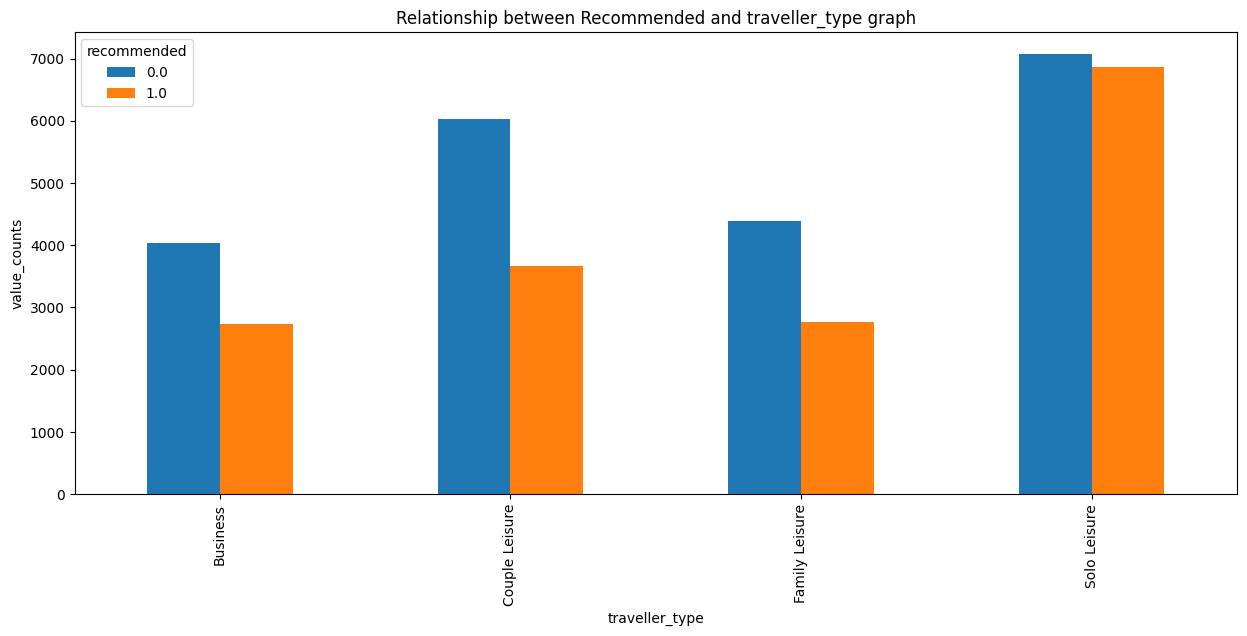

cabin


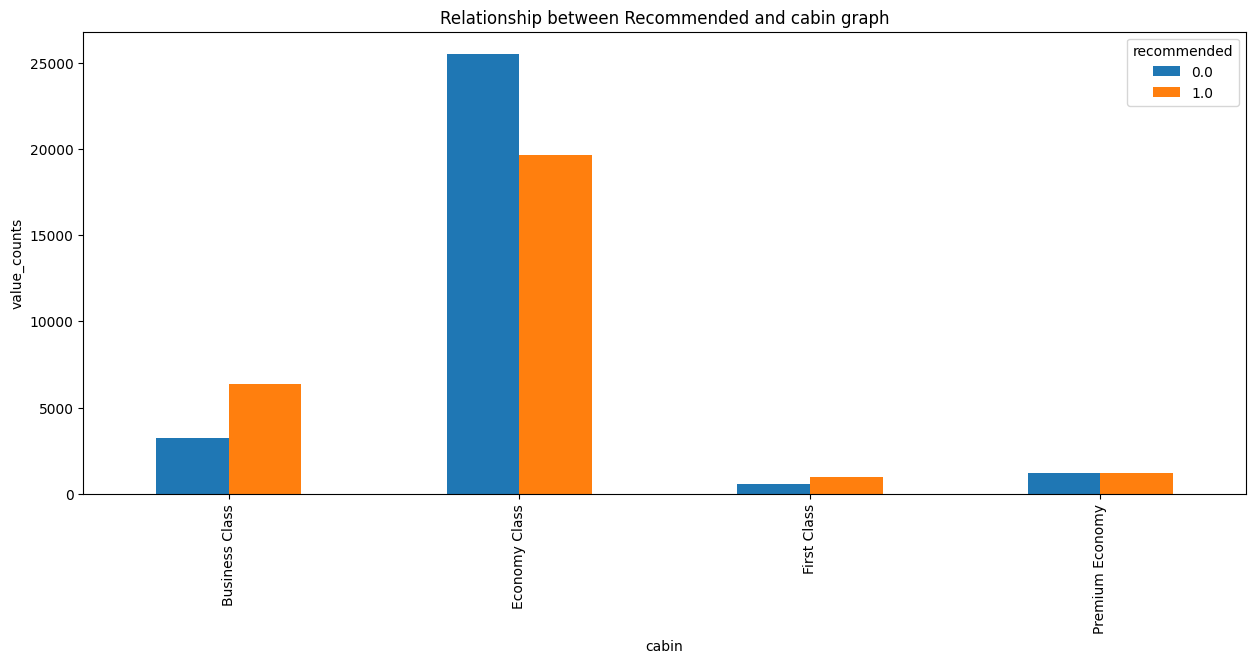

travel_month


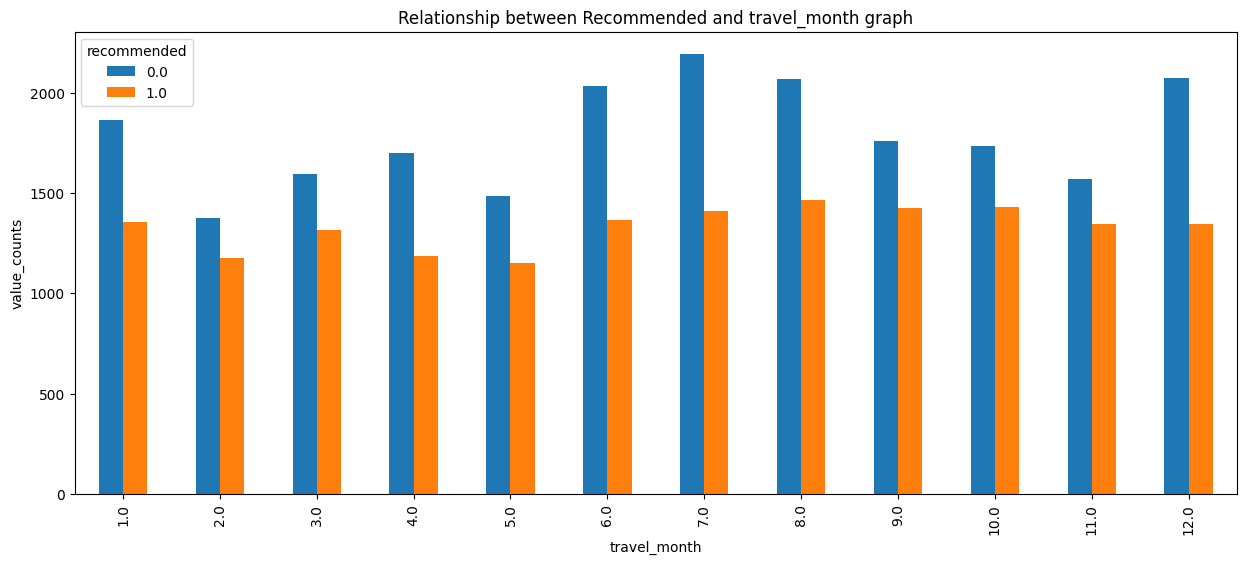

overall


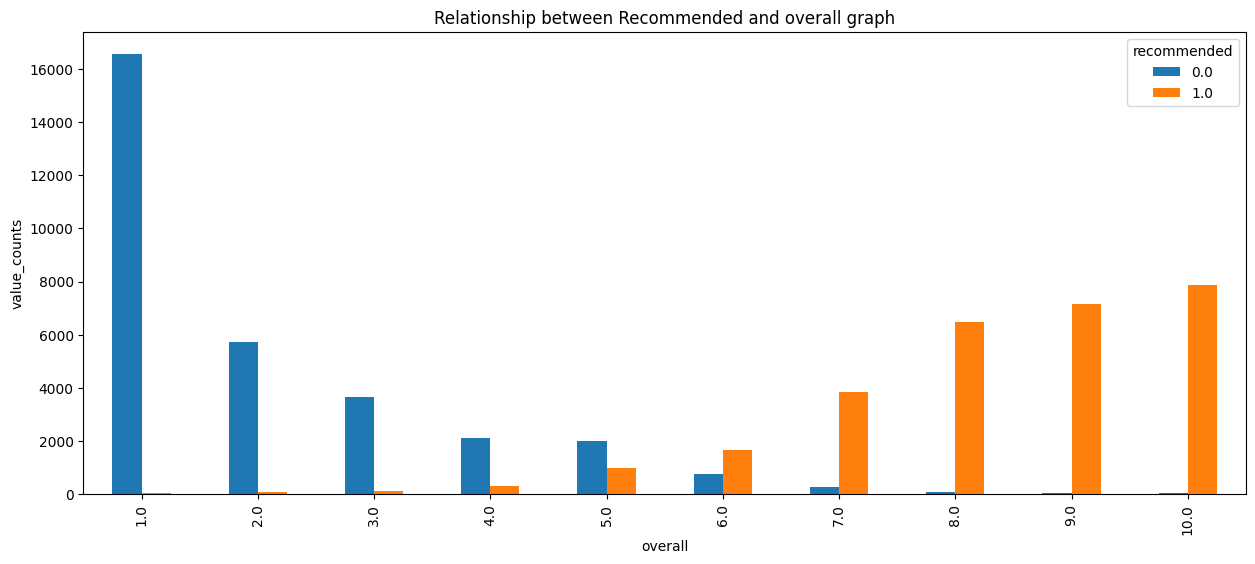

seat_comfort


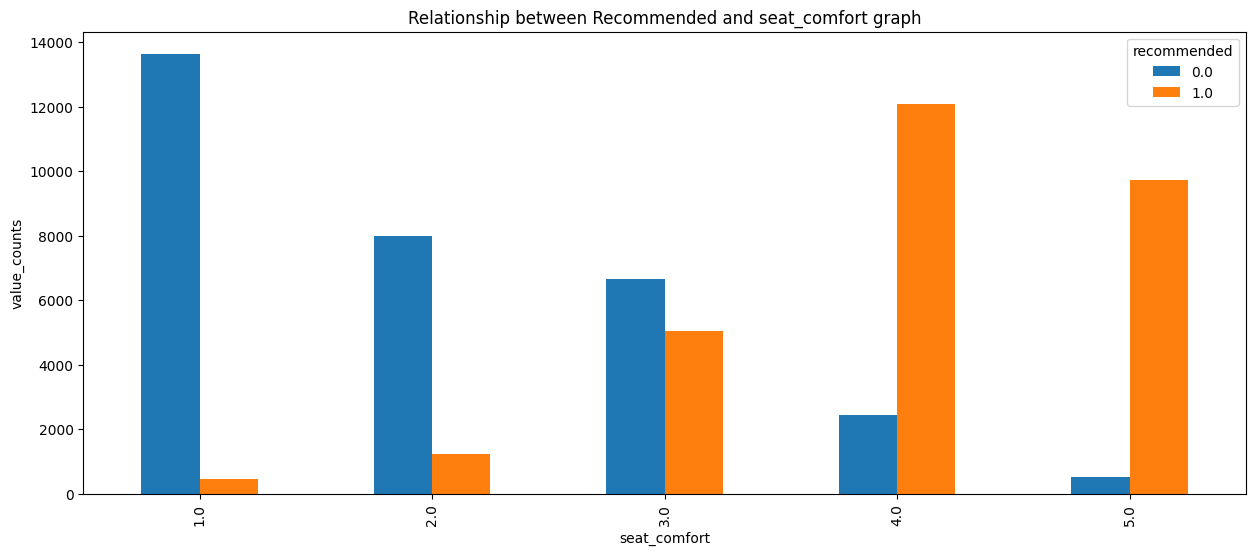

cabin_service


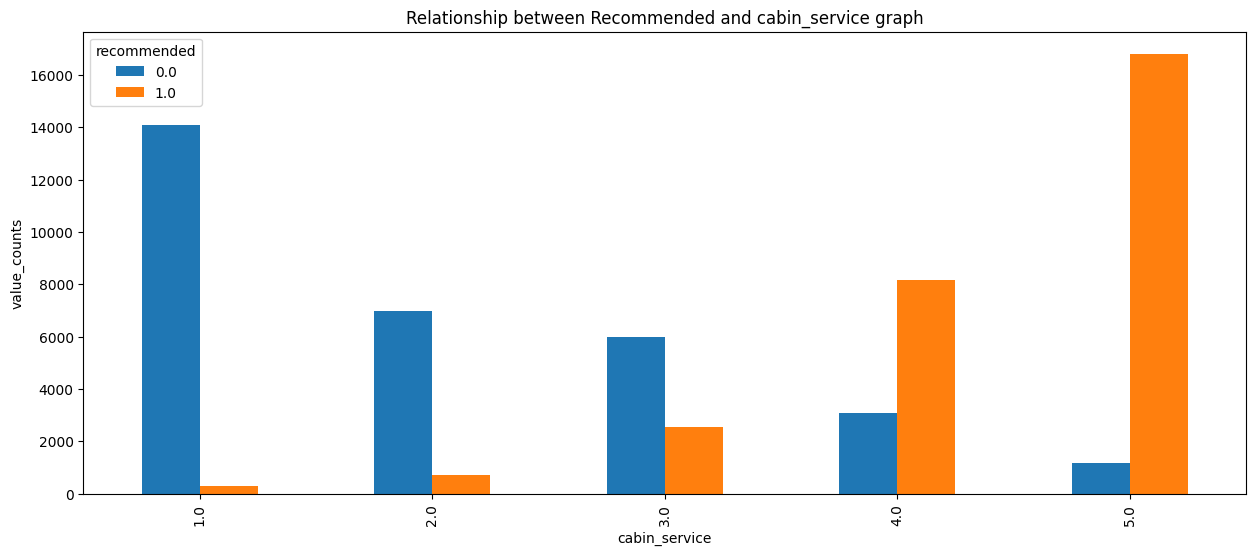

food_bev


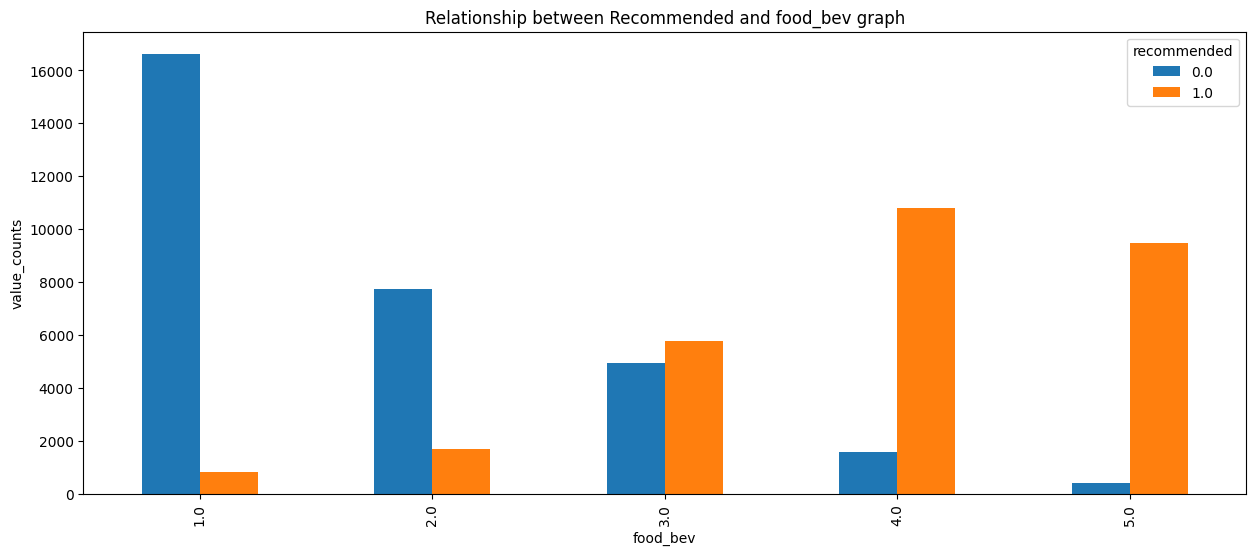

entertainment


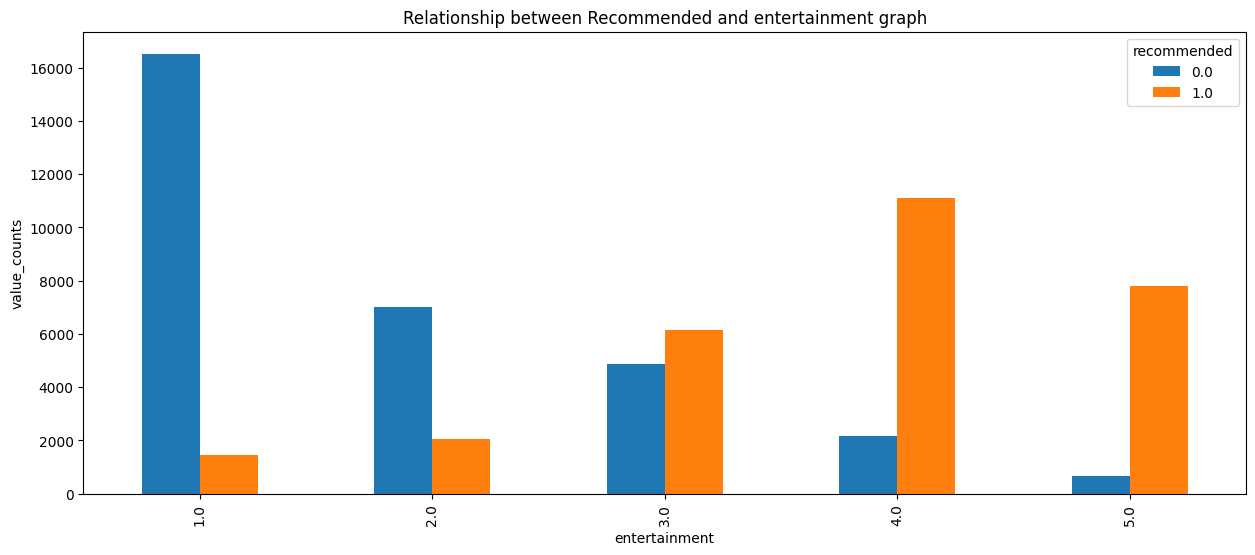

ground_service


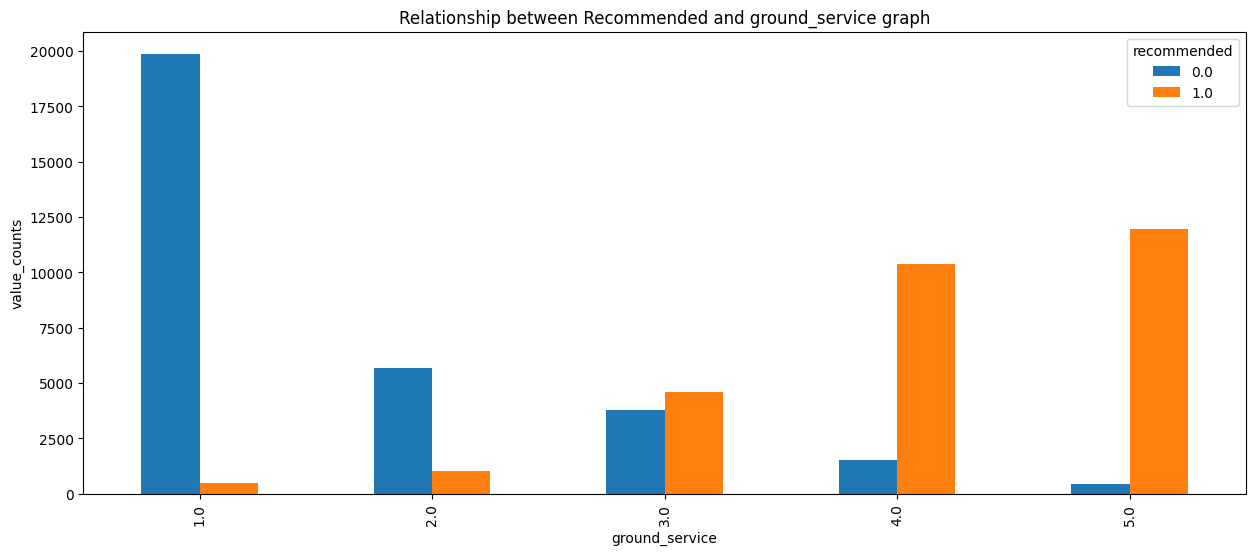

value_for_money


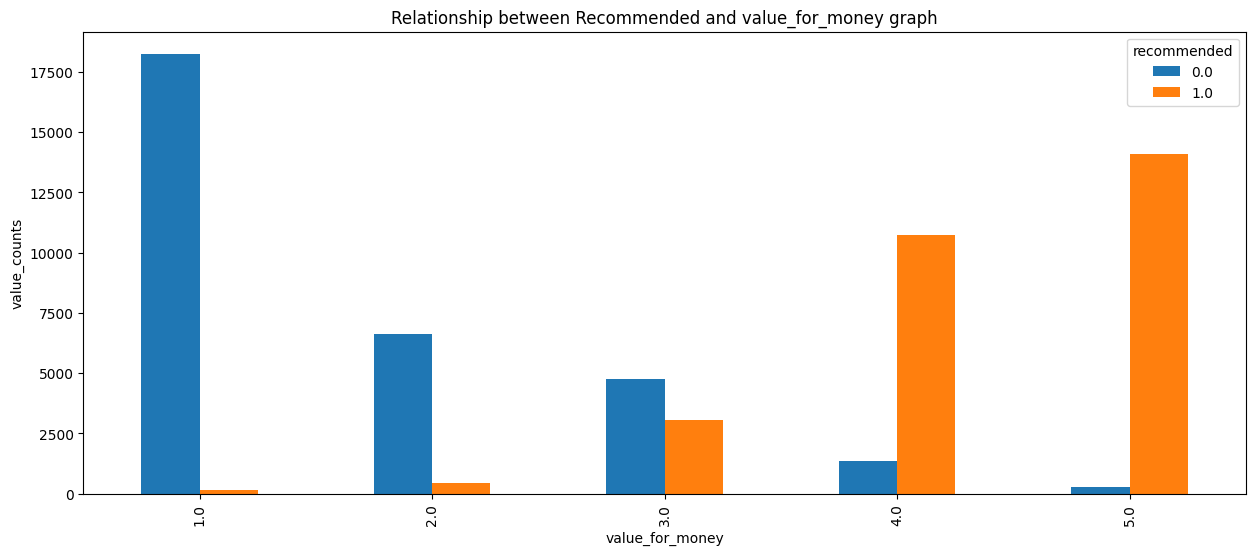

In [45]:
#plotting graph of count of feature group by target variable
for i in features2:
  print(i)
  df2.groupby([i])['recommended'].value_counts().unstack().plot(kind='bar',figsize=(15,6))
  plt.title(f"Relationship between Recommended and {i} graph")
  plt.xlabel(i)
  plt.ylabel("value_counts")
  plt.show()

* We can conclude following things from above:
  * We can see that people have given both 1 or 0 which we will consider from now on as positive and negative recomendation so to interpret it effectively to the solo leisure. This may because of the poor infrastructure or the service recieved by the people and positive recommedation may be because of low price for solo. But this is approximate analysis based on the data provided.
  * Also we can see that people gives the high positive recommendation to economic class in cabin. From this we can conclude that people love to travel in economic class as of low price also in same way we can see people give highest negative recomendation to economy class maybe because less infrastrure or service provided to them. Also we can see people have given higest positive recommedation to Business class it may be because of the quality of service provided to them in Business class and simmilarly negative recoomendation because of high price of business class or less travelling percentage.
  * From month vs no. of recommendation. We can see that people tents to travel most in the month of July considering the total of positive and negative recommendation combined.
  * From overall vs recommended graph we can see which is perfectly understandable that negative recommendation has been given to the overall rating of 1.0 and high positive recommendation has been given to the overall rating of 10. But it is very true that highest negative recommendation has been given to overall rating of 1.0 which is really a matter of concern.
  * In seat comfort people has given highest positive recommended to the seat of class 5 as compared to very low negative recommendation to the same. Also we can see seat of class 1 have been given highest negative recommendation as compare to its positive recommendation. Here we come to a conclusion it must be removed as early as possible.
  * In cabin service rating people has given highest recommendation to rating to cabin service rating 5 as compare to its counterpart. From this we can conclude that cabin service is doing pretty good.
  * In food and beverage rating people have given highest negative recommendation to rating 1.0 from this we can conclude that airline service has to improve their food delivery and quality service.
  * In entertainment also we can see most people has given highest negative recommendation to entertaiment rating 1 which shows  that airline has to improve their entertainment system as well.
  * In ground service also we can see most people has given highest negative recommendation to ground service rating 1 which shows  that airline has to improve their ground service.
  * In value for money also we can see most people has given highest negative recommendation to value for money rating 1 which shows  that airline has to make their flight service more cost effective.

traveller_type


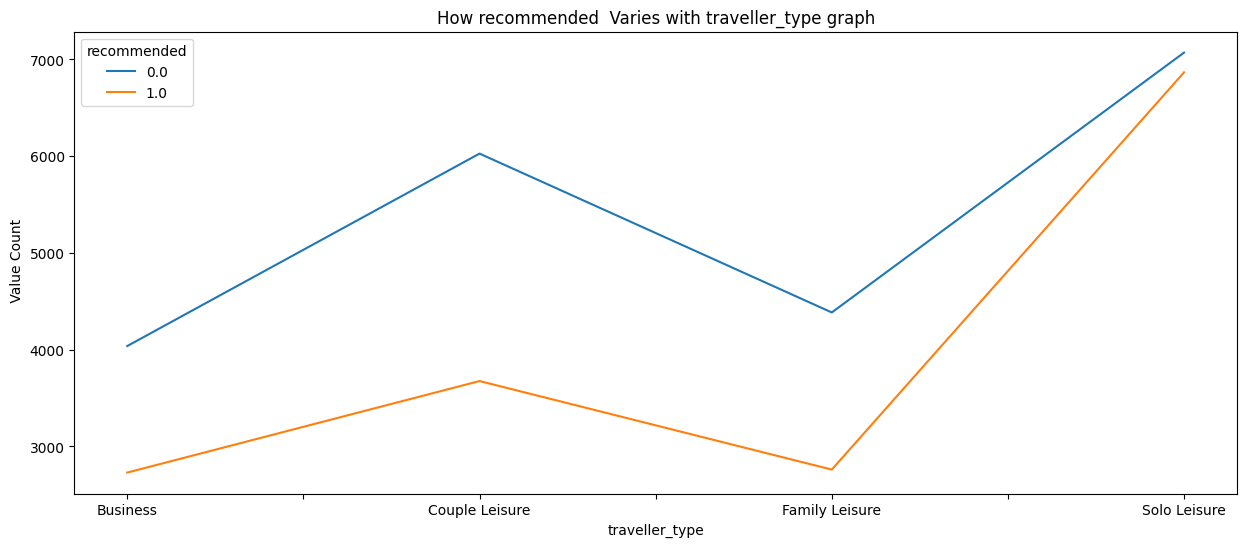

cabin


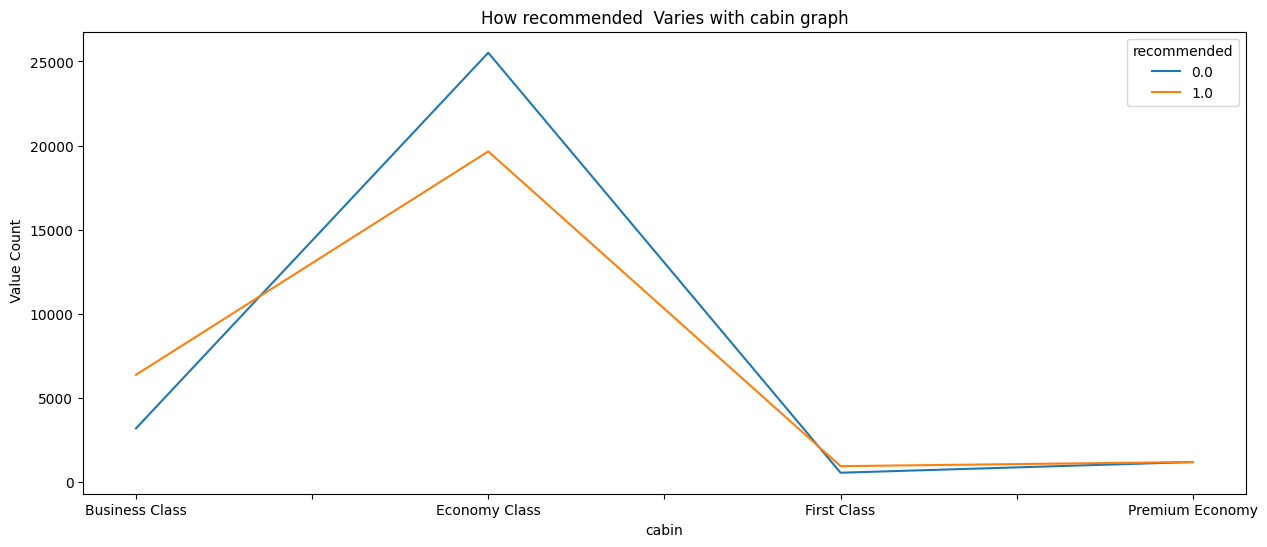

travel_month


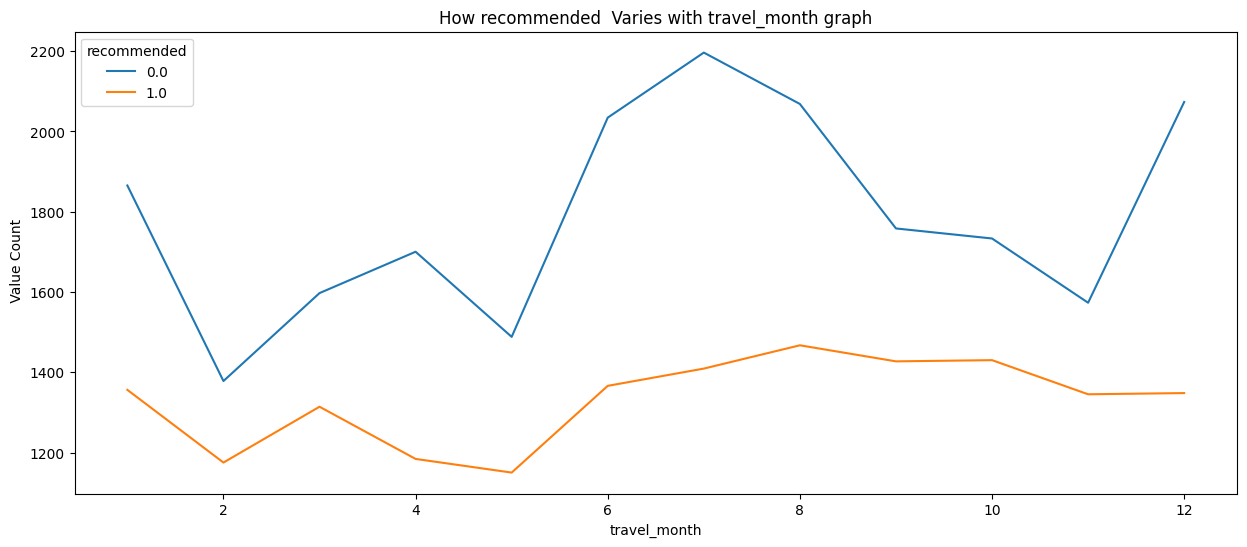

overall


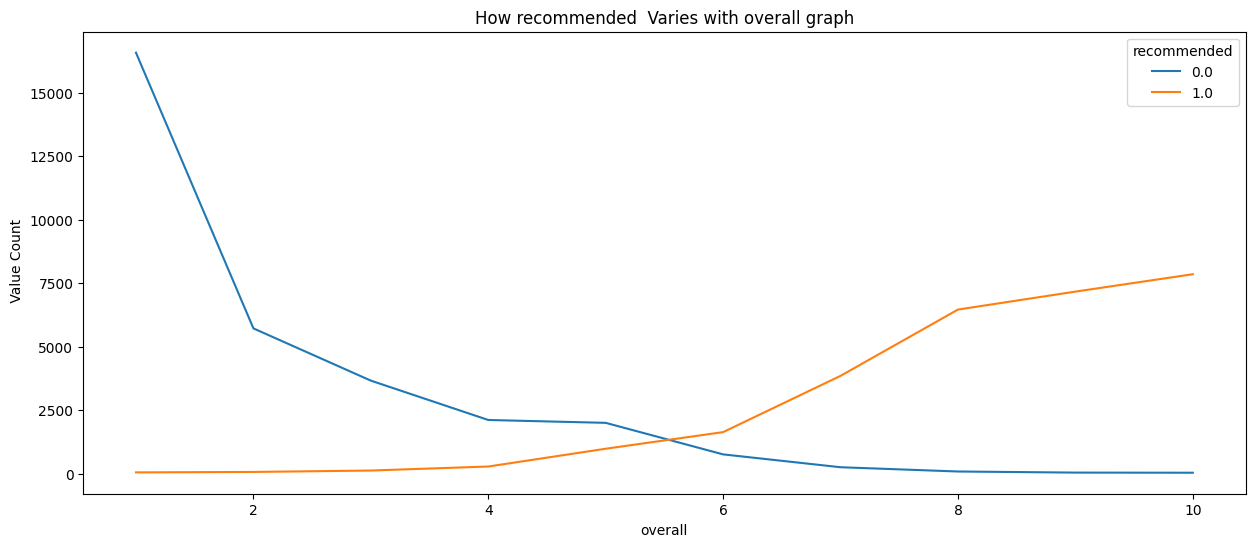

seat_comfort


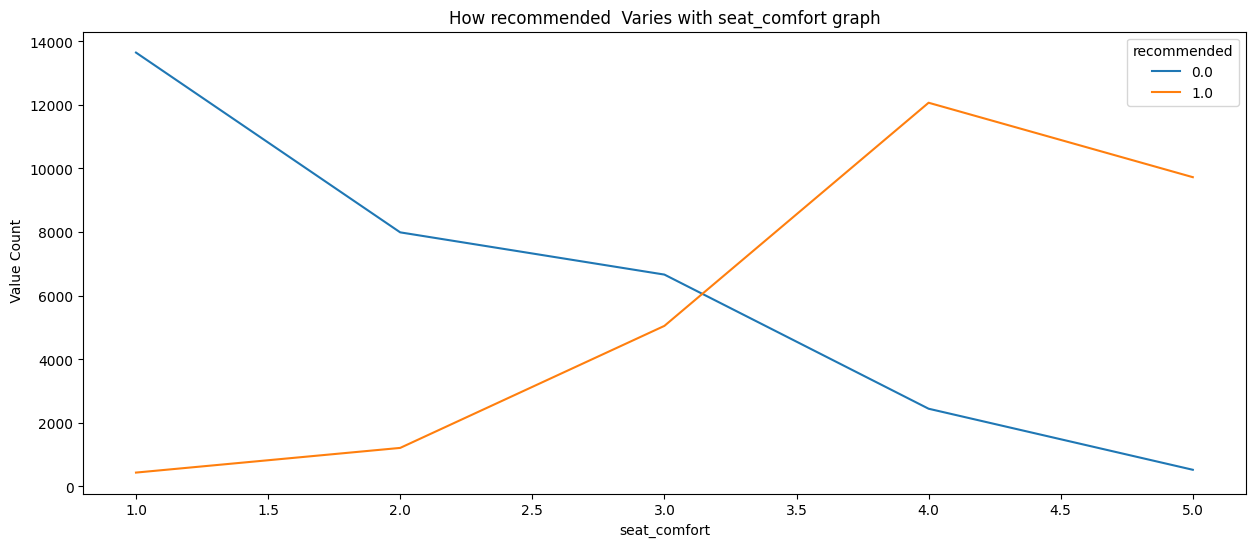

cabin_service


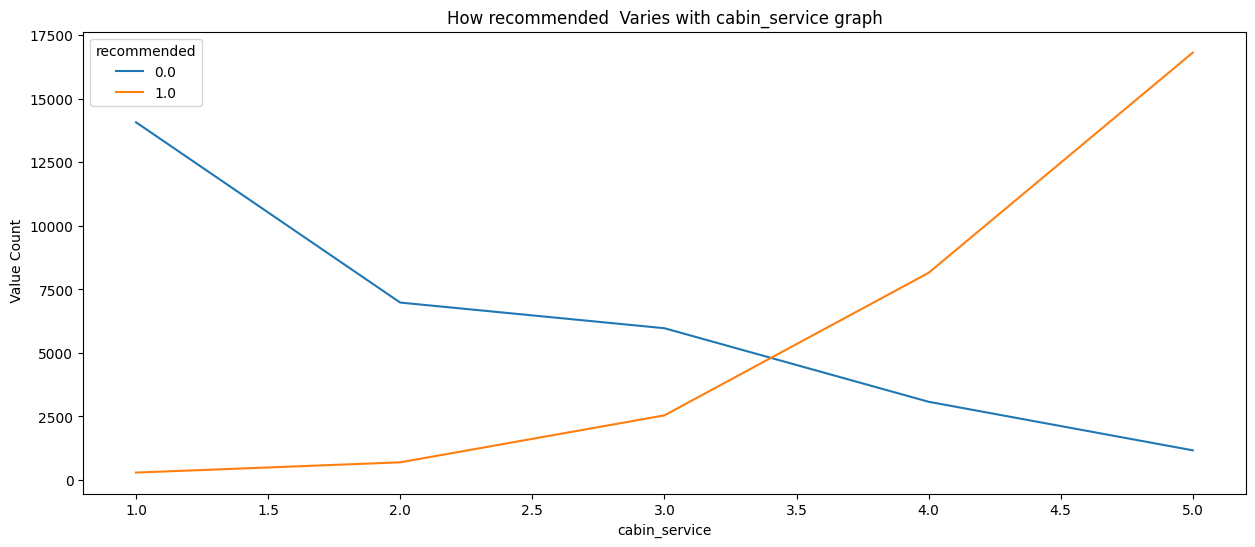

food_bev


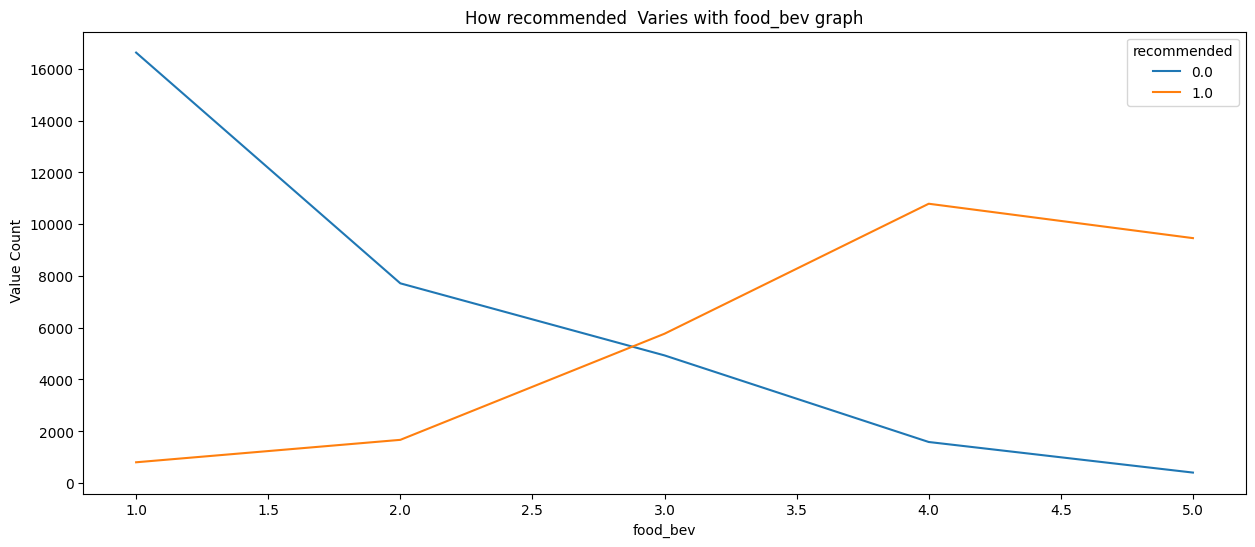

entertainment


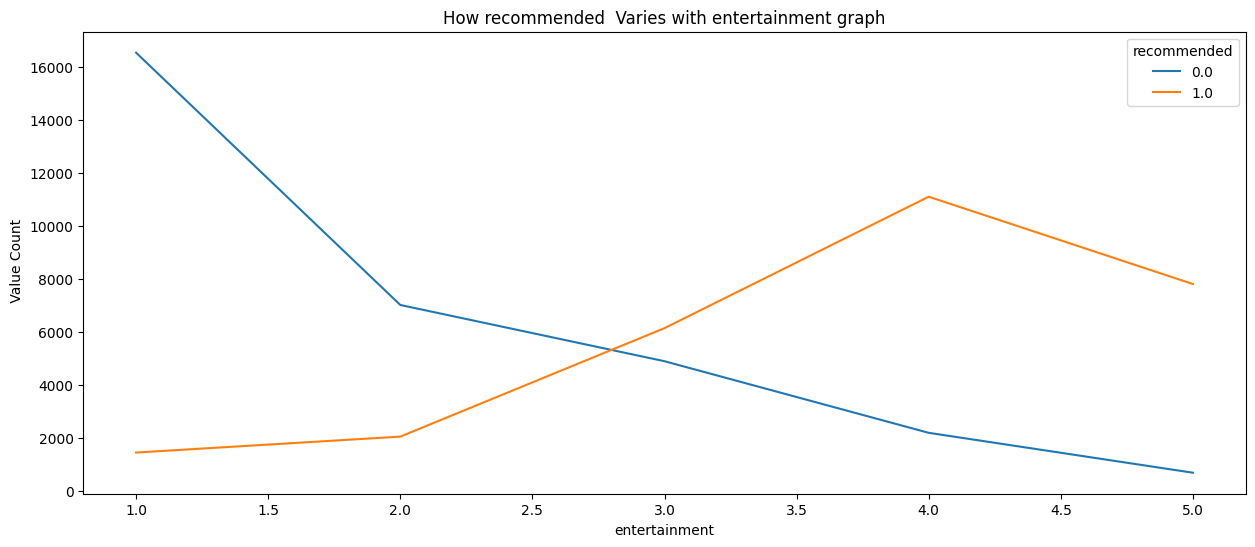

ground_service


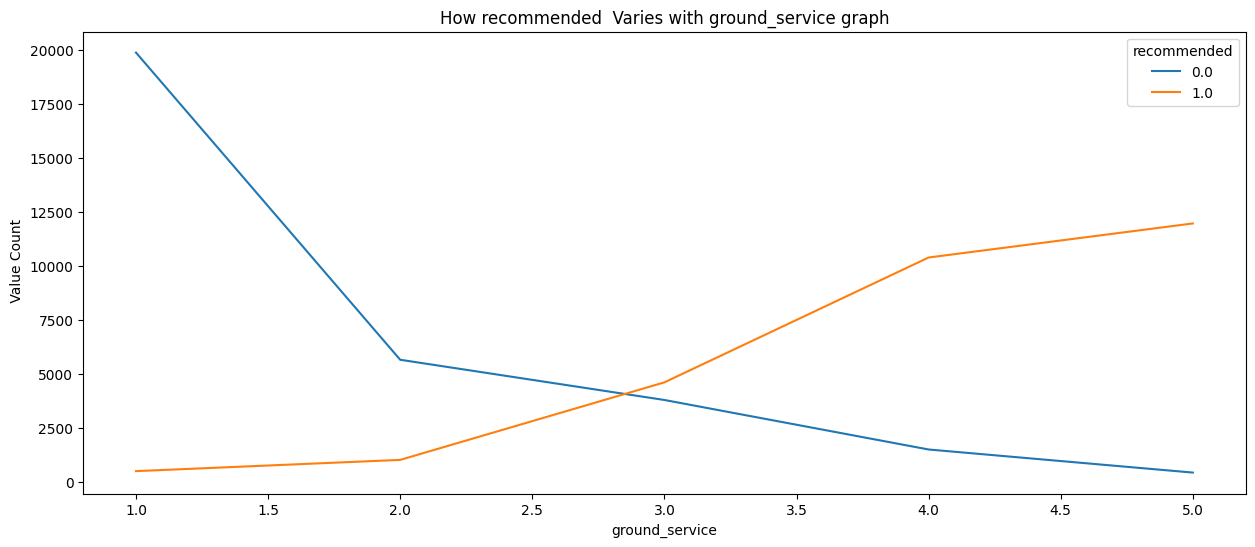

value_for_money


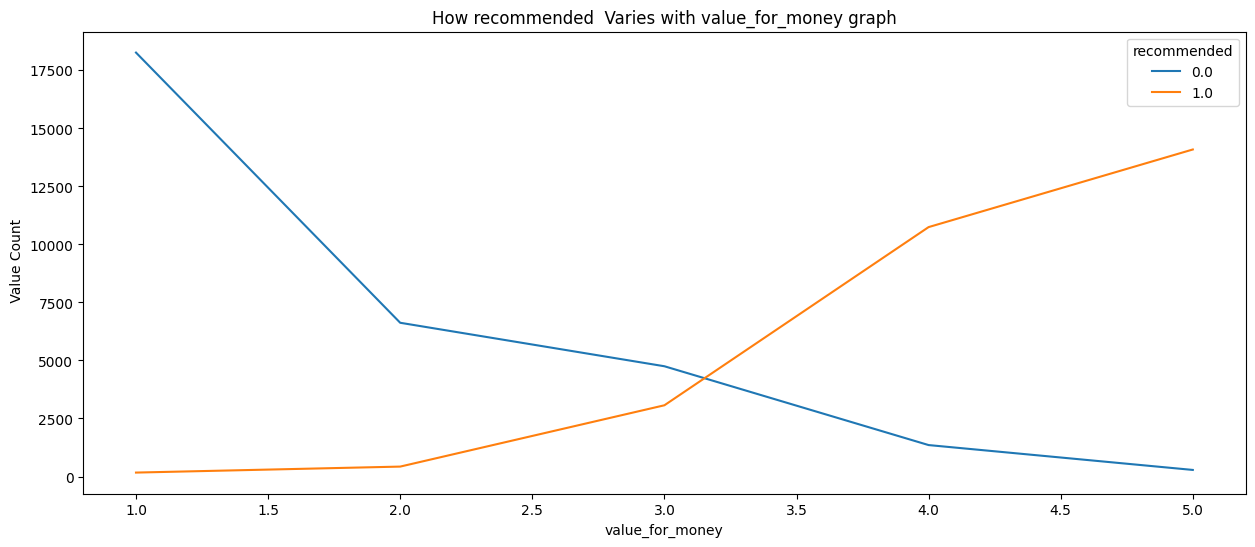

In [46]:
#Ploting line graph of count of feature grouped by target variable to analyze the trend
for feature in features2:
  print(feature)
  df2.groupby([feature])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()

* In Traveller type we can see that both the recommendation trend as of yes or no increases from business to couple leisure and decreases to family then again increases high in solo leisure. Which indicate people prefer solo leisure higher than any of the other leisures.
* In Cabin type we can see that both the recommendation trend as of yes or no increases from business to Economy class and decreases to First class then again increases slightly in Premium class. Which indicate most people travel on economy class.
* In month we cannot see any preferable trend but here we can conclude people tent to travel highest during the month of July.
* In overall rating we can experience a very good insights which is also regular. We can see as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases.
* In seat comfort we can see as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in seat comfort rating 3.0 where we can see similar positive and negative recommendation.
* In cabin service we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in cabin service rating 3.5 where we can see similar positive and negative recommendation.
* In food service we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in food service rating close to 3.0 where we can see similar positive and negative recommendation.
* In Entertainment service too we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Entertainment service rating between 2.5 and 3.0 where we can see similar positive and negative recommendation.
* In Ground service also we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Ground service rating close 3.0 where we can see similar positive and negative recommendation.
* Lastly in Value for money rating we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Value for money rating greater than 3.0 where we can see similar positive and negative recommendation.


In [47]:
#checking the  null value if exist
df2.recommended.isna().sum()

1422

In [48]:
df2.tail()

,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,recommended,travel_month,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
61178,Ukraine International,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,0.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61179,Ukraine International,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,0.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61180,Ukraine International,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,0.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61181,Ukraine International,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,0.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61182,Ukraine International,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,0.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0


In [49]:
#dropping redundant feature which are not required
df2.drop(['author','aircraft','review_date','route','travel_month'],axis=1,inplace=True)

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   customer_review  61183 non-null  object 
 2   traveller_type   37540 non-null  object 
 3   cabin            58705 non-null  object 
 4   recommended      59761 non-null  float64
 5   overall          61183 non-null  float64
 6   seat_comfort     61183 non-null  float64
 7   cabin_service    61183 non-null  float64
 8   food_bev         61183 non-null  float64
 9   entertainment    61183 non-null  float64
 10  ground_service   61183 non-null  float64
 11  value_for_money  61183 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.6+ MB


**notna() method returns a DataFrame object where all the values are replaced with a Boolean value True or False**

In [51]:
#notna() method returns a DataFrame object where all the values are replaced with a Boolean value True or False
df2 = df2[df2['recommended'].notna()]

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59761 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   customer_review  59761 non-null  object 
 2   traveller_type   37539 non-null  object 
 3   cabin            58704 non-null  object 
 4   recommended      59761 non-null  float64
 5   overall          59761 non-null  float64
 6   seat_comfort     59761 non-null  float64
 7   cabin_service    59761 non-null  float64
 8   food_bev         59761 non-null  float64
 9   entertainment    59761 non-null  float64
 10  ground_service   59761 non-null  float64
 11  value_for_money  59761 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.9+ MB


* Here we can see that there are 59761 rows and 12 columns.Also we can see that there are 8 float type feature and 4 object type feature.

#**NLP(Natural Language Processing) for reviews**

We have used vander sentiment in  NLP so to convert sentiments in  customer review into score so to  have our model prediction

In [53]:
# Install vaderSentiment package
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [54]:
#Importing SentimentIntensity Analyzer Class
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [55]:
#create function to get sentiment score for review
def sentiment_score(s):
  #create SentimentIntensityAnalyzer object
  sia_object=SentimentIntensityAnalyzer()
  #scoring each reviews depending on their polarity
  sentiment_dict=sia_object.polarity_scores(s)
  return sentiment_dict['compound']

We have also created new feature  numeric review so to store sentiment  score we have retrieved using  sentiment analysis from customer  review feature.


In [56]:
#creatic numeric review column to find and store the polarity of each customer review
df2['numeric_review']=df2['customer_review'].apply(sentiment_score)

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59761 entries, 0 to 61182
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   customer_review  59761 non-null  object 
 2   traveller_type   37539 non-null  object 
 3   cabin            58704 non-null  object 
 4   recommended      59761 non-null  float64
 5   overall          59761 non-null  float64
 6   seat_comfort     59761 non-null  float64
 7   cabin_service    59761 non-null  float64
 8   food_bev         59761 non-null  float64
 9   entertainment    59761 non-null  float64
 10  ground_service   59761 non-null  float64
 11  value_for_money  59761 non-null  float64
 12  numeric_review   59761 non-null  float64
dtypes: float64(9), object(4)
memory usage: 6.4+ MB


In [58]:
# Check the correlation plot

corr = numeric_df2.corr()
corr.style.background_gradient(cmap='RdYlGn')

,recommended,travel_month,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
recommended,1.000000,-0.004002,0.898390,0.719521,0.756843,0.736565,0.668660,0.797478,0.837220
travel_month,-0.004002,1.000000,-0.004173,0.000088,-0.005573,-0.002793,-0.015751,-0.004096,-0.007617
overall,0.898390,-0.004173,1.000000,0.791971,0.820029,0.803981,0.740649,0.881449,0.896356
seat_comfort,0.719521,0.000088,0.791971,1.000000,0.708728,0.725471,0.708497,0.719685,0.758560
cabin_service,0.756843,-0.005573,0.820029,0.708728,1.000000,0.776758,0.666898,0.747785,0.764541
food_bev,0.736565,-0.002793,0.803981,0.725471,0.776758,1.000000,0.729318,0.716689,0.763086
entertainment,0.668660,-0.015751,0.740649,0.708497,0.666898,0.729318,1.000000,0.671103,0.706957
ground_service,0.797478,-0.004096,0.881449,0.719685,0.747785,0.716689,0.671103,1.000000,0.822223
value_for_money,0.837220,-0.007617,0.896356,0.758560,0.764541,0.763086,0.706957,0.822223,1.000000


**recommended,ground-service,value for money in relation with overall give good correlation**

In [59]:
#Dropping customer review to replace with numeric review.
df2.drop('customer_review' , axis =1, inplace =True)
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 59761 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   traveller_type   37539 non-null  object 
 2   cabin            58704 non-null  object 
 3   recommended      59761 non-null  float64
 4   overall          59761 non-null  float64
 5   seat_comfort     59761 non-null  float64
 6   cabin_service    59761 non-null  float64
 7   food_bev         59761 non-null  float64
 8   entertainment    59761 non-null  float64
 9   ground_service   59761 non-null  float64
 10  value_for_money  59761 non-null  float64
 11  numeric_review   59761 non-null  float64
dtypes: float64(9), object(3)
memory usage: 5.9+ MB


Now we have numeric_review column in liew of customer_review. also we have 59761 rows, 9 floattype, 3 object type data

##**One Hot encoding for categorical features**

In [60]:

# categoriacal features to do one hot encoding
cat_col =['airline','cabin','traveller_type']

In [61]:
dummy=pd.get_dummies(df2,columns=cat_col,drop_first=False)

In [62]:
dummy.columns

Index(['recommended', 'overall', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'numeric_review',
       'airline_ANA All Nippon Airways', 'airline_Adria Airways',
       'airline_Aegean Airlines', 'airline_Aer Lingus',
       'airline_Aeroflot Russian Airlines', 'airline_Aeromexico',
       'airline_Air Arabia', 'airline_Air Canada', 'airline_Air Canada rouge',
       'airline_Air China', 'airline_Air Europa', 'airline_Air France',
       'airline_Air India', 'airline_Air New Zealand', 'airline_AirAsia',
       'airline_Alaska Airlines', 'airline_Alitalia',
       'airline_American Airlines', 'airline_Asiana Airlines',
       'airline_Austrian Airlines', 'airline_Avianca',
       'airline_Bangkok Airways', 'airline_British Airways',
       'airline_Brussels Airlines', 'airline_Cathay Pacific Airways',
       'airline_China Eastern Airlines', 'airline_China Southern Airlines',
       'airline_Copa Airlines', 'airline_Delta Air 

* To prepare machine learning model and do furthur operations we have to do one hot encoding to categorical features  like airline,cabin,traveller_type

##**Let's Split the Data to Train and Test**

In [63]:
#import libraries
from sklearn.model_selection import train_test_split

In [64]:
#getting the independent variables
X=dummy.drop('recommended',axis=1)
#getting the dependent variables
y=dummy['recommended']


In [65]:
#perform train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

* In model selection we first did a train and test split in 4:1 or 80:20 split with random_state=0


In [66]:
# Get shapes for Train and Test set
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((47808, 97), (11953, 97), (47808,), (11953,))

**The final dataset was of shape (59761, 97) which was split to (47808, 97) as Train data and (11953,97) as
Test data.**


In [67]:
column = ['Model','Accuracy','Recall','Precision','f1-score','roc_auc_score']
evaluation_metrics_df= pd.DataFrame(columns = column)


###**Creating Function to store evaluation metrics values**

In [68]:
#creating function to store evolution matrics value
def evaluation_metric(model,y_test,pred_value,metric_df):
  metric_df=metric_df.append({'Model':model,
                              'Accuracy':accuracy_score(y_test,pred_value),
                              'Recall':recall_score(y_test,pred_value),
                              'Precision':precision_score(y_test,pred_value),
                              'f1_score':f1_score(y_test,pred_value),
                              'roc_auc_score':roc_auc_score(y_test,pred_value)},ignore_index=True)
  return metric_df


* A confusion matrix helps us gain an insight into how correct our predictions were and how they hold up against the actual values.
* In the simplest terms, Precision is the ratio between the True Positives and all the Positives (true positives+ false positives).
* The recall is the measure of our model correctly identifying True Positives.(ratio of true positive and (true positive + false negative))
* Accuracy is the ratio of the total number of correct predictions and the total number of predictions
* F1-score is the Harmonic mean of the Precision and Recall. it would be indicative of a good Precision and a good Recall value as well
* The macro average is the arithmetic mean of the individual class related to precision, memory, and f1 score. We use macro average scores when we need to treat all classes equally to evaluate the overall performance of the classifier against the most common class labels.
* Weighted accuracy is computed by taking the average, over all the classes, of the fraction of correct predictions in this class (i.e. the number of correctly predicted instances in that class, divided by the total number of instances in that class).

##**Logistic Regression**

Logistic regression is a classification technique that predicts the likelihood of a single-valued result (i.e. a dichotomy). A logistic regression yields a logistic curve with values only ranging from 0 to 1

In [69]:
#logistic regression fitting
log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [70]:
log_reg.coef_

array([[ 9.38840795e-01,  1.66155857e-01,  2.57536391e-01,
         1.29014570e-01,  5.41076070e-02,  1.81286461e-01,
         6.88035343e-01,  5.95017034e-01,  3.61730353e-01,
         1.33958014e-01,  6.24255041e-01,  1.30639287e-01,
        -1.09571252e-01, -2.58965338e-01, -1.41314433e-01,
         9.69024067e-02, -6.53122896e-01,  2.84997768e-02,
         6.48651397e-01, -1.24798097e-01, -8.83825531e-02,
         5.91809032e-03,  3.43577297e-01,  3.72396549e-01,
        -3.79606224e-01, -9.05176705e-02, -3.38248777e-01,
        -2.55986475e-02,  1.11491262e-01, -6.96429802e-01,
        -3.54999269e-01,  1.31847698e-01, -2.59935502e-01,
        -2.20721708e-01,  1.81174778e-02,  6.53318029e-01,
        -1.58070053e-01, -1.17113389e-01, -4.68059986e-01,
        -6.54553981e-02,  1.68043937e-01, -6.01249956e-01,
        -1.92458828e-01, -4.67633468e-01, -8.60951727e-02,
         5.09451520e-01,  8.23775307e-01, -9.01109469e-02,
        -2.37308037e-01, -1.71255959e-01, -6.18238739e-0

In [71]:
log_reg.intercept_

array([-11.33795326])

In [72]:
log_reg.score(X_test,y_test)

0.9564126160796452

In [73]:
from sklearn.metrics import classification_report

In [74]:
y_pred = log_reg.predict(X_test)

In [75]:
#report of logistic regression
report_lR = classification_report(y_test, y_pred)
print(report_lR)

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      6277
         1.0       0.95      0.95      0.95      5676

    accuracy                           0.96     11953
   macro avg       0.96      0.96      0.96     11953
weighted avg       0.96      0.96      0.96     11953



<Axes: >

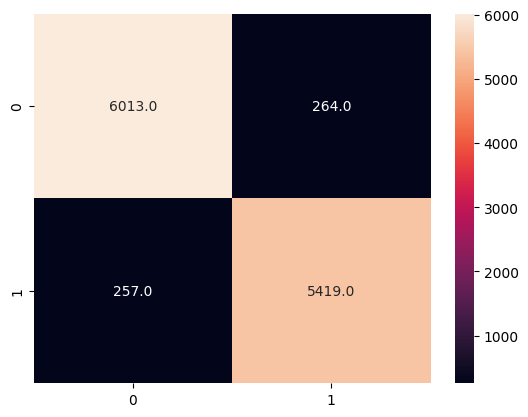

In [76]:
#cofusion matrix of logistic regression
confuse_matrix_lr = confusion_matrix( y_test,y_pred)
#plooting confusion matrix
sns.heatmap(confuse_matrix_lr, annot=True, fmt = ".1f")

* In logistic regression to learn the coefficients of features in order to maximize the probability of correctly classifying the classes. For this maximum likelihood concept is used.
* Here we can see accuracy of our logistic regression model is 95.64% and precision, recall , f-1 scores are also high and good. It defines that it is a good machine learning model

#**Decision Tree**

A decision tree is a supervised learning technique used to solve categorization problems. Both categorical and continuous input and output variables are supported

In [77]:
#Initializing Decision Tree Model object
tree_classify=DecisionTreeClassifier()
#Taining a model with x and y
tree_classify.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
print("Training Accuracy of Decision Tree Model is",tree_classify.score(X_train,y_train))
print("Testing Accuracy of Decision Tree Model is",tree_classify.score(X_test,y_test))

Training Accuracy of Decision Tree Model is 1.0
Testing Accuracy of Decision Tree Model is 0.9365849577511922


In [79]:
y_pred = tree_classify.predict(X_test)

In [80]:
#report of decision tree
report_dec_tree = classification_report(y_test, y_pred)
print(report_dec_tree)

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      6277
         1.0       0.93      0.94      0.93      5676

    accuracy                           0.94     11953
   macro avg       0.94      0.94      0.94     11953
weighted avg       0.94      0.94      0.94     11953



Here our model is Overfitted. So Hyperparameter tuning is done to prune a Decision tree to preserve Generalized Model.

#Hyperparameter Tuning For Decision Tree

In [81]:
#setting the parameters and scoring metric
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['f1','recall','precision','accuracy']

In [82]:
#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
tree_cv = GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_, cv=5,refit='accuracy')

#Fitting x and y to gridsearchcv model using an estimator Decision tree classifier
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             refit='accuracy',
             scoring=['f1', 'recall', 'precision', 'accuracy'])

In [83]:
#calling an best params
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [84]:
#calling an best score
tree_cv.best_score_

0.9566390631115509

93% accuracy of Decision Tree with the help of hypermatring tunning.

* Here we can see accuracy of our decision tree model is 93.64% and precision, recall , f-1 scores are also high and good. It defines that it is a good machine learning model

#**Random Forest**

We create several trees in the Random Forest model rather than a single tree in the CART model. From the subsets of the original dataset, we create trees. These subsets can contain a small number of columns and rows. Each tree assigns a categorization to a new object based on attributes, and we say that the tree "votes" for that class. The classification with the highest votes is chosen by the forest.

In [85]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [86]:
random_forest.score(X_test,y_test)

0.9576675311637246

In [87]:
#report of decision tree
report_ran_forest = classification_report(y_test, y_pred)
print(report_ran_forest)

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      6277
         1.0       0.93      0.94      0.93      5676

    accuracy                           0.94     11953
   macro avg       0.94      0.94      0.94     11953
weighted avg       0.94      0.94      0.94     11953



<Axes: >

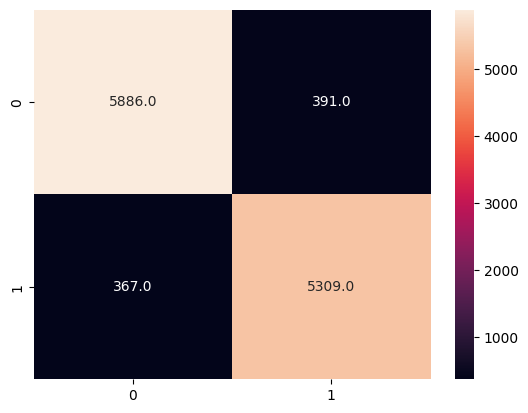

In [88]:
#cofusion matrix of random forest
confuse_matrix_rf = confusion_matrix( y_test,y_pred)
#plooting confusion matrix
sns.heatmap(confuse_matrix_rf, annot=True, fmt = ".1f")

:* Here we can see accuracy of our random forest model is 94% and precision, recall , f-1 scores are also high and good. It defines that it is a good machine learning model

##**Random Forest with GridSearchCV**

In [89]:
random_forest_gridcv = GridSearchCV(estimator=random_forest,
                       param_grid = parameters,
                       cv = 5, verbose=2)

In [90]:
random_forest_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   2.1s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   2.1s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   2.1s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   2.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   3.1s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   2.6s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   2.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   2.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   2.1s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             verbose=2)

In [91]:
#getting best parameter from grid search
random_forest_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 7}

In [92]:
#assigning best param variable
rf_grid_best = random_forest_gridcv.best_estimator_

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      6277
         1.0       0.96      0.95      0.95      5676

    accuracy                           0.96     11953
   macro avg       0.96      0.95      0.96     11953
weighted avg       0.96      0.96      0.96     11953


Accuracy score % of the model is 95.52%



Text(0.5, 1.0, 'Confusion Matrix for Random Forest with GridSearchCV')

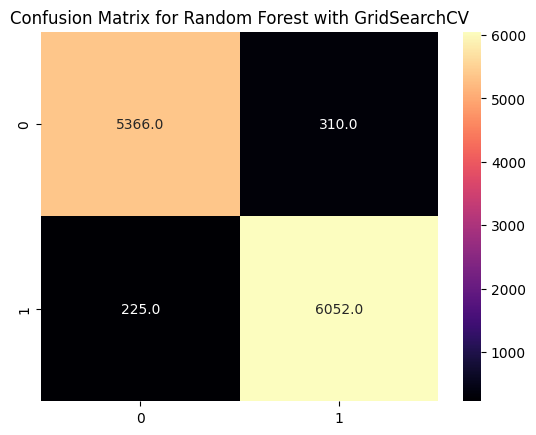

In [93]:
#model evaluation
pred_value = rf_grid_best.predict(X_test)


print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='magma')
plt.title('Confusion Matrix for Random Forest with GridSearchCV')


* The	best	parameters	for	this	grid	search max_depth	12,	min_sample_leaf	50
min_sample_split 100 and n_estimators as 80. S that the model accuracy we obtained is 95.5%.
* precision, recall , f-1 scores are also high and good. It defines that it is a good machine learning model

#**Support Vector Machine**

* SVM(Support Vector Machine) SVMs take a direct approach to binary classification by attempting to find a hyperplane in a feature space that "best" separates the two class
* In practice, however, finding a hyperplane that completely separates the classes using only the original features is challenging (if not impossible). SVMs get around this by expanding the idea of separating hyperplanes in two different ways.
(1) Expand the feature space to the point where perfect separation of classes is (more) likely, and
(2) apply the so-called kernel trick to extend the feature space.
Support Vector - the dividing line between two sets of points that maximizes the margin between them A number of the training sites are nearly on the edge of the margin, as represented by the black circles in this diagram. The support vectors are the pivotal elements of this fit, and they are known as the key aspects of this fit.


In [94]:
support_vector = SVC(kernel='linear')
support_vector.fit(X_train, y_train)

SVC(kernel='linear')

In [95]:
#score for support vector machine
support_vector.score(X_test, y_test)

0.9568309211076718

In [96]:
y_pred = support_vector.predict(X_test)

In [97]:
#confusion matrix
support_vector_con_mat = confusion_matrix( y_test,y_pred)
support_vector_con_mat

array([[6029,  248],
       [ 268, 5408]])


Accuracy score % of the model is 95.52%



Text(0.5, 1.0, 'Confusion Matrix for SVM')

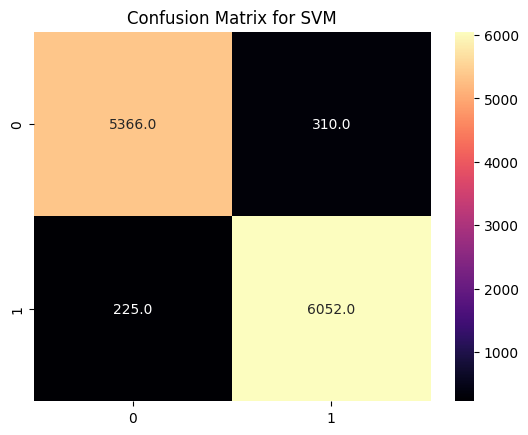

In [98]:
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='magma')
plt.title('Confusion Matrix for SVM')


* Here we can see accuracy of our svm model is 95.68% and precision, recall , f-1 scores are also high and good. It defines that it is a good machine learning model

#**K-nearest neighbour model**

K Nearest Neighbour is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbours are classified.

In [99]:
#using knn model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
score=knn.score(X_test,y_test)
print(f'K-nearest-neighbour score : {score}')

K-nearest-neighbour score : 0.9538191249058814


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      6277
         1.0       0.95      0.95      0.95      5676

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953


Accuracy score % of the model is 95.38%



Text(0.5, 1.0, 'Confusion Matrix for K-nearest-neighbour')

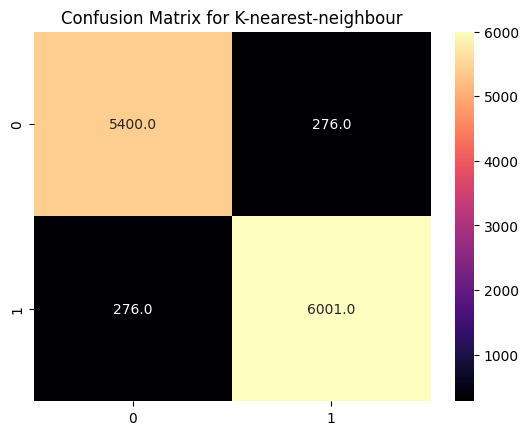

In [100]:
#model evaluation
pred_value = knn.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='magma')
plt.title('Confusion Matrix for K-nearest-neighbour')

* Here we can see accuracy of our k-nearest neighbour model is 95.38% and precision, recall , f-1 scores are also high and good. It defines that it is a good machine learning model





# **Naive Bayes Classifier**


In [101]:
from sklearn.naive_bayes import GaussianNB

#Implimanting naive bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [102]:
#score for naive bayes
naive_bayes.score(X_train,y_train)

0.8705655957161981

87% accuracy with naive bayes classifier

In [103]:
# making predictions on the testing set
y_pred = naive_bayes.predict(X_test)

In [104]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 86.94888312557516


#**Accuracy Metrics for All Fitted Model**

In [105]:
#Creating a function to return all Models Accuracy Score

def accuracy_of_each_model(model,x_train,x_test):

  #predicting a train datas
  y_train_preds=model.predict(x_train)

  #predicting a test datas
  y_test_preds=model.predict(x_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)

  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  # Get the precision scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics



In [106]:
models=[log_reg,tree_cv,random_forest,knn,support_vector,naive_bayes]
name=['Logistic Regression Model','Decision Tree Model After Hyperparameter Tuning','Random Forest Model After Hyperparameter Tuning','k_neighbor','support vector','naive bayes']

In [107]:
for model_ in range(len(models)):
  train_score_,test_score_,metrics_=accuracy_of_each_model(models[model_],X_train,X_test)
  print("-*-*-"*3+f"{name[model_]}"+"-*-*-"*4)
  print("")
  print(pd.DataFrame(data={'Metrics':metrics_,'Train_Score':train_score_,'Test_Score':test_score_}))
  print("")

-*-*--*-*--*-*-Logistic Regression Model-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.958961    0.956413
1  Precsion_Score     0.956606    0.953546
2    Recall_Score     0.957444    0.954722
3   Roc_Auc_Score     0.958895    0.956332

-*-*--*-*--*-*-Decision Tree Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.958124    0.954488
1  Precsion_Score     0.961019    0.957072
2    Recall_Score     0.950826    0.946617
3   Roc_Auc_Score     0.957807    0.954112

-*-*--*-*--*-*-Random Forest Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.999979    0.957668
1  Precsion_Score     1.000000    0.959637
2    Recall_Score     0.999956    0.950846
3   Roc_Auc_Score     0.999978    0.957341

-*-*--*-*--*-*-k_neighbor-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.966114  

#**XGBoost model**

XGBoost is a distributed gradient boosting library that has been optimised for performance, flexibility, and portability. It uses the Gradient Boosting paradigm to implement machine learning algorithms. XGBoost is a parallel tree boosting (also known as GBDT, GBM) algorithm that solves a variety of data science problems quickly and accurately.

In [108]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
score=xgb_model.score(X_test,y_test)
print(f'XGBoost score : {score}')

XGBoost score : 0.9556596670291977


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      6277
         1.0       0.95      0.95      0.95      5676

    accuracy                           0.96     11953
   macro avg       0.96      0.96      0.96     11953
weighted avg       0.96      0.96      0.96     11953


Accuracy score % of the model is 95.57%



Text(0.5, 1.0, 'Confusion Matrix for XGBoost')

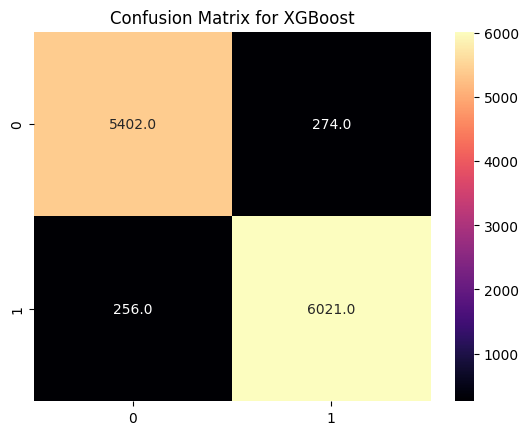

In [109]:
#model evaluation
pred_value = xgb_model.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='magma')
plt.title('Confusion Matrix for XGBoost')

* Here we can see accuracy of our xgBoost model is 95.71% and precision, recall , f-1 scores are also high and good. It defines that it is a good machine learning model

#Model Explainability
##**SHAP(SHapley Additive exPlanations)**

In [110]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.4 MB/s eta 0:00:00


**SHAP Interpretation**
* **Base value**: This is the average feature value. This value is used to determine if the prediction is whether true or false.
* **Red color Block**: This represent the feature for which the prediction is positive. Higher this value will pushes the prediction positively.
* **Blue color block**: This represent the feature for which the prediction is negative. higher this value will pushes the prediction negatively
* **Block size**: the block size shows the feature importance. larger the block size larger will the feature importance value.

##**Creating function for getting shape OF tree based model with JS visualization using SHAP in notebook environment**

In [111]:
import shap
# JavaScript visualizations is initialized
def get_shap_js(model):
  shap.initjs()
#define a tree explainer for the built model
  explainer=shap.TreeExplainer(dtc)
#obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(X_test.iloc[0])
  return shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0])





#**Creating Function to get SHAP summary**

In [112]:
#creating function to get shap summary in scatter plot
def shap_scatter_plot(model):
  shap_values= shap.TreeExplainer(model).shap_values(X_test)
  return shap.summary_plot(shap_values[0],X_test)

In [113]:
#creating function to get shap summary in bar plot
def shap_bar_plot(model):
  shap_values=shap.TreeExplainer(model).shap_values(X_test)
  return shap.summary_plot(shap_values,X_train,plot_type='bar')

In [114]:
X_test.iloc[0]

overall                            1.0
seat_comfort                       4.0
cabin_service                      2.0
food_bev                           3.0
entertainment                      3.0
                                 ...  
cabin_Premium Economy            False
traveller_type_Business          False
traveller_type_Couple Leisure    False
traveller_type_Family Leisure     True
traveller_type_Solo Leisure      False
Name: 43190, Length: 97, dtype: object

In [115]:
X_test.mean()

overall                          5.073956
seat_comfort                     2.970802
cabin_service                    3.179369
food_bev                         2.789844
entertainment                    2.745838
                                   ...   
cabin_Premium Economy            0.041078
traveller_type_Business          0.109680
traveller_type_Couple Leisure    0.159960
traveller_type_Family Leisure    0.119301
traveller_type_Solo Leisure      0.233665
Length: 97, dtype: float64

##**Conclusion:**

* The Models used for this Classsification problem are
1.  Logistic Regression Model
2.   Decision Tree Model
3.   Random Forest Model
4.   K-Nearest Neighbor Model
5.   Support Vector Machine Model
6.   Naive Baye

* We can conclude following things from above:
  * Spirit Airways is the most frequently used airlines with a total count of around 2800 according to the dataset given
aircraft A320 has travelled most frequently and also been used by most of the people.
  * we can notice that Solo Leisure has highest value count. From this we can conclude that most of people who travel through airline travels in solo. Followed by College then Family. 77% of passengers chose to fly in economy class.most of the people prefers cost-effective economy class air travel and high income peoples are generally prefer business class as it is 2nd most popular cabin type

  * We can also conclude that people tends to air travel more after june and from february to may they are not prefering air travel. july has the most air travel count


  * We can see that people have given both 1 or 0 which we will consider from now on as positive and negative recomendation so to interpret it effectively to the solo leisure. This may because of the poor infrastructure or the service recieved by the people and positive recommedation may be because of low price for solo. But this is approximate analysis based on the data provided.
  * review features ratings positiviley impacts overall rating of airlines and obviously it massively impacts airline businesses.when 'seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money' these features rating are high then overall rating of airlines are also high.
  * 44 % of passengers gave an overall rating of 7 and above on a scale of 10, for the services offered by the airlines.It implies that this section of people think that airlines are giving good services. people extremely dislikes ground-service(40%),food-beverage service(27%),value for money(30%),entertainment(30%) services of airlines. we can conclude that airlines have to work hard to improve their services otherwise it can negatively impacts airline business very soon.
  * Also we can see that people gives the high positive recommendation to economic class in cabin. From this we can conclude that people love to travel in economic class as of low price also in same way we can see people give highest negative recomendation to economy class maybe because less infrastructure or service provided to them. Also we can see people have given higest positive recommedation to Business class it may be because of the quality of service provided to them in Business class and simmilarly negative recoomendation because of high price of business class or less travelling percentage.
  * From month vs no. of recommendation. We can see that people tends to travel most in the month of July considering the total of positive and negative recommendation combined.
  * From overall vs recommended graph we can see which is perfectly understandable that negative recommendation has been given to the overall rating of 1.0 and high positive recommendation has been given to the overall rating of 10. But it is very true that highest negative recommendation has been given to overall rating of 1.0 which is really a matter of concern.
  * In seat comfort people has given highest positive recommended to the seat of class 5 as compared to very low negative recommendation to the same. Also we can see seat of class 1 have been given highest negative recommendation as compare to its positive recommendation. Here we come to a conclusion it must be removed as early as possible.
  * In cabin service rating people has given highest recommendation to rating to cabin service rating 5 as compare to its counterpart. From this we can conclude that cabin service is doing pretty good.
  * In food and beverage rating people have given highest negative recommendation to rating 1.0 from this we can conclude that airline service has to improve their food delivery and quality service.
  * In entertainment also we can see most people has given highest negative recommendation to entertaiment rating 1 which shows  that airline has to improve their entertainment system as well.
  * In ground service also we can see most people has given highest negative recommendation to ground service rating 1 which shows  that airline has to improve their ground service.
  * In value for money also we can see most people has given highest negative recommendation to value for money rating 1 which shows  that airline has to make their flight service more cost effective.
  * In model Selection we can see that Random Forest and XGBoost Model is having the same high Model Accuracy with a score 0.957082 but we can also see that recall, precision, f1-score and roc_auc_score of XGBoost model combined is giving higher score than Random Forest from which we have chosen XGBoost Model for further prediction.
  * In Shap JS summary we can see positive features overall, value for money,numeric_review combined red color block pushes the prediction toward right over base value and causing positive model prediction and it is common for all model.
  * In Shap summary scatter plot we can see in scatter plot high overall,value for money,numeric_review,cabin service,ground_service positive features and low airline_British_airways is increasing positive prediction and it is common for all models. Also we can see that overall,value for money,numeric_review,cabin service,ground_service has high shap feature value.  

# **THANK-YOU**